# **Bibliotecas**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as m
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.preprocessing import normalize
from sklearn import preprocessing
import plotly.offline as py
import plotly.graph_objs as go

# **Acesso ao drive**

In [ ]:
from google.colab import drive

drive.mount("/content/drive")
data = pd.read_csv("drive/MyDrive/AM1-T2-Emissao-CO2/CO2-Emissions.csv")

Mounted at /content/drive


# **Análise do dataset**

## Informação

In [ ]:
display(data)

Make        Model   Vehicle Class  Engine Size(L)  Cylinders  \
0     ACURA          ILX         COMPACT             2.0          4   
1     ACURA          ILX         COMPACT             2.4          4   
2     ACURA   ILX HYBRID         COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV - SMALL             3.5          6   
4     ACURA      RDX AWD     SUV - SMALL             3.5          6   
...     ...          ...             ...             ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
0             AS5         Z                               9.9   
1              M6         Z                              11.2   
2             AV7         Z                               6.0   
3             AS6         Z                              12.7   
4             AS6         Z                              12.1   
...           ...       ...                               ...   
7380          AS8         Z                              10.7   
7381          AS8         Z                              11.2   
7382          AS8         Z                              11.7   
7383          AS8         Z                              11.2   
7384          AS8         Z                              12.2   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                                 6.7                               8.5   
1                                 7.7                               9.6   
2                                 5.8                               5.9   
3                                 9.1                              11.1   
4                                 8.7                              10.6   
...                               ...                               ...   
7380                              7.7                               9.4   
7381                              8.3                               9.9   
7382                              8.6                              10.3   
7383                              8.3                               9.9   
7384                              8.7                              10.7   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
0                              33                  196  
1                              29                  221  
2                              48                  136  
3                              25                  255  
4                              27                  244  
...                           ...                  ...  
7380                           30                  219  
7381                           29                  232  
7382                           27                  240  
7383                           29                  232  
7384                           26                  248  

[7385 rows x 12 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [ ]:
data.describe()

Engine Size(L)    Cylinders  Fuel Consumption City (L/100 km)  \
count     7385.000000  7385.000000                       7385.000000   
mean         3.160068     5.615030                         12.556534   
std          1.354170     1.828307                          3.500274   
min          0.900000     3.000000                          4.200000   
25%          2.000000     4.000000                         10.100000   
50%          3.000000     6.000000                         12.100000   
75%          3.700000     6.000000                         14.600000   
max          8.400000    16.000000                         30.600000   

       Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
count                      7385.000000                       7385.000000   
mean                          9.041706                         10.975071   
std                           2.224456                          2.892506   
min                           4.000000                          4.100000   
25%                           7.500000                          8.900000   
50%                           8.700000                         10.600000   
75%                          10.200000                         12.600000   
max                          20.600000                         26.100000   

       Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
count                  7385.000000          7385.000000  
mean                     27.481652           250.584699  
std                       7.231879            58.512679  
min                      11.000000            96.000000  
25%                      22.000000           208.000000  
50%                      27.000000           246.000000  
75%                      32.000000           288.000000  
max                      69.000000           522.000000

In [ ]:
print("\n\n--------------------------------------\n")
print("Value Counts - FUEL TYPE")
print(data["Fuel Type"].value_counts())

print("\n--------------------------------------\n")
print("Value Counts - Cylinders")
print(data["Cylinders"].value_counts())

print("\n--------------------------------------\n")
print("Value Counts - TRANSMISSION")
print(data["Transmission"].value_counts())



--------------------------------------

Value Counts - FUEL TYPE
X    3637
Z    3202
E     370
D     175
N       1
Name: Fuel Type, dtype: int64

--------------------------------------

Value Counts - Cylinders
4     3220
6     2446
8     1402
12     151
3       95
10      42
5       26
16       3
Name: Cylinders, dtype: int64

--------------------------------------

Value Counts - TRANSMISSION
AS6     1324
AS8     1211
M6       901
A6       789
A8       490
AM7      445
A9       339
AS7      319
AV       295
M5       193
AS10     168
AM6      132
AV7      118
AV6      113
M7        91
A5        84
AS9       77
A4        65
AM8       62
A7        53
AV8       39
A10       31
AS5       26
AV10      11
AM5        4
AM9        3
AS4        2
Name: Transmission, dtype: int64


O dataset é composto de 7385 amostras de 12 atributos, sem campos vazios ou incoerentes. Os atributos são descritos a seguir:

*   Make  -> Fabricante
*   Model -> Modelo do carro
*   Vehicle Class -> Tipo do carro (Esporivo, SUV, Van, etc.)
*   Engine Size -> Volume do motor
*   Cylinders -> Número de cilindros
*   Transmission -> tipo de câmbio
  *   A  - Automático
  *   AM - Automático Manual
  *   AS - Automático com seleção de Shift
  *   AV - Variável
  *   M  - Manual
  *   3-10 - Quantidade de marchas
*   Fuel Type -> tipo de combustível
  *   X - Gasolina
  *   Z - Gasolina Premium
  *   D - Diesel
  *   E - Ethanol
  *   N - Gás Natural
*   Fuel Consumption City -> Consumo do combustível na cidade (em L/100Km)
*   Fuel Consumption Hwy  -> Consumo do combustível na estrada (em L/100Km)
*   Fuel Consumption Comb -> Consumo do combustível média (em L/100Km)
*   Fuel Consumption Comb -> Consumo do combustível média (em mpg)
*   CO2 Emission -> Taxa de emissão de dióxido de carbono em g/Km








## Gráficos

### Histogramas

<ipython-input-8-8d677ade846c>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

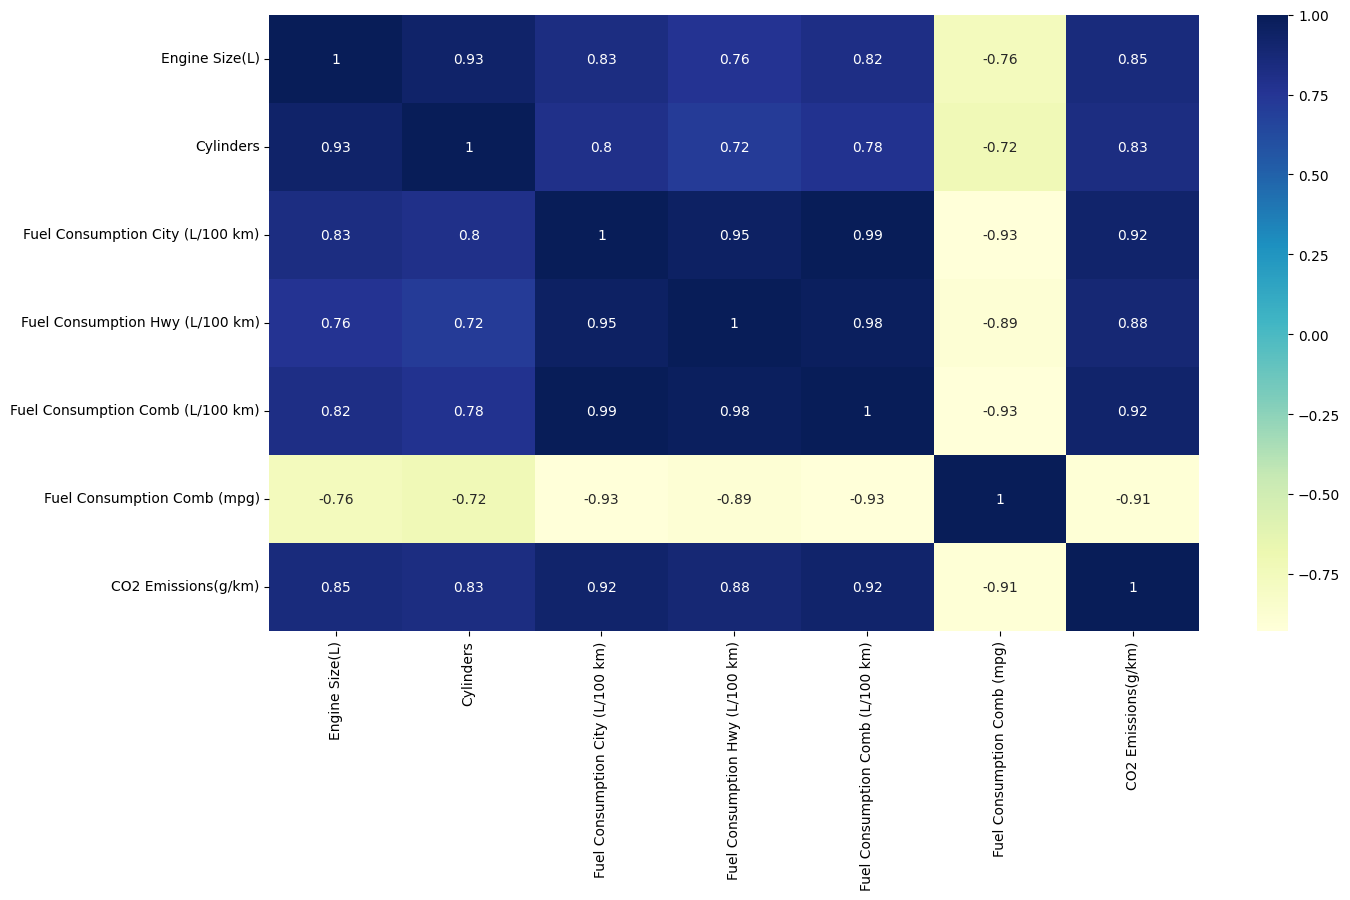

In [ ]:
dataToCorr = data
plt.figure(figsize=(15, 8))
sns.heatmap(dataToCorr.corr(), annot=True, cmap="YlGnBu")

array([[<Axes: title={'center': 'Engine Size(L)'}>,
        <Axes: title={'center': 'Cylinders'}>],
       [<Axes: title={'center': 'Fuel Consumption City (L/100 km)'}>,
        <Axes: title={'center': 'Fuel Consumption Hwy (L/100 km)'}>],
       [<Axes: title={'center': 'Fuel Consumption Comb (L/100 km)'}>,
        <Axes: title={'center': 'Fuel Consumption Comb (mpg)'}>],
       [<Axes: title={'center': 'CO2 Emissions(g/km)'}>, <Axes: >]],
      dtype=object)

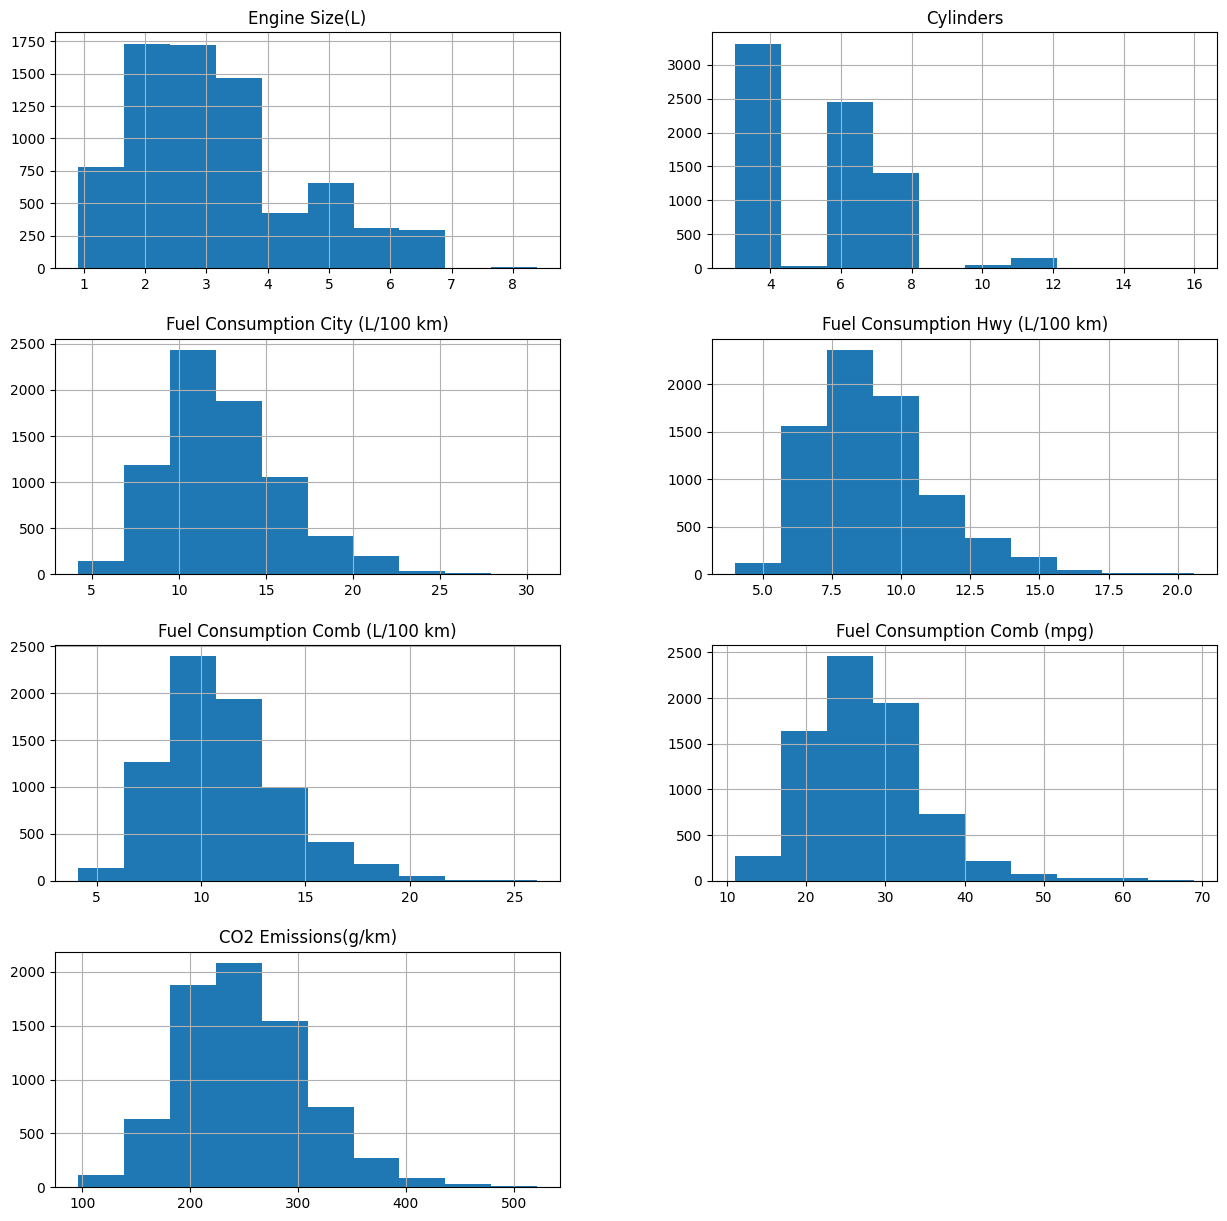

In [ ]:
# Mostrando gráficos com as frequências de cada um dos atributos
data.hist(layout=(4, 2), figsize=(15, 15))

### Boxplot Emissão de CO2


 CO2 Emissions(g/km)


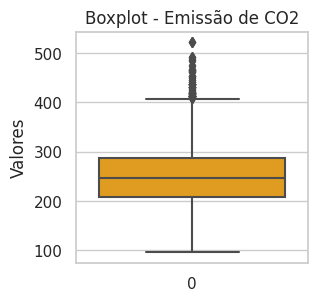

In [ ]:
print("\n CO2 Emissions(g/km)")
plt.figure(figsize=(3, 3))
cores = ['orange']
sns.set(style="whitegrid")
ax = sns.boxplot(data = data["CO2 Emissions(g/km)"], palette=cores)
ax.set_title("Boxplot - Emissão de CO2")
ax.set_ylabel("Valores")
plt.show()

### Boxplot Tamanho do motor


Engine Size(L)


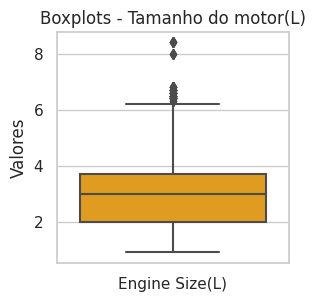

In [ ]:
print("\nEngine Size(L)")
plt.figure(figsize=(3, 3))
cores = ['orange']
sns.set(style="whitegrid")
df_engine_size = data[['Engine Size(L)']]

ax = sns.boxplot(data=df_engine_size, palette=cores)
ax.set_title("Boxplots - Tamanho do motor(L)")
ax.set_ylabel("Valores")
plt.show()

### Boxplot Consumo de combustível


 Fuel Consumption Comb (L/100 km)


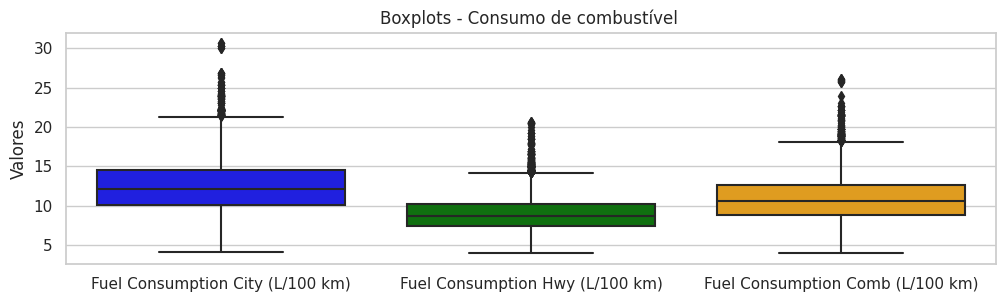

In [ ]:
print("\n Fuel Consumption Comb (L/100 km)")
plt.figure(figsize=(12, 3))
cores = ['blue', 'green', 'orange']

df_consumo_combustivel = data[['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)']]

sns.set(style="whitegrid")
ax = sns.boxplot(data=df_consumo_combustivel, palette=cores)
ax.set_title("Boxplots - Consumo de combustível ")
ax.set_ylabel("Valores")
plt.show()


# Pré-Processamento

## Removendo duplicatas

In [ ]:
# Colocando colunas texto em uppercase
data['Make'] = data['Make'].str.upper()
data['Model'] = data['Model'].str.upper()
data['Vehicle Class'] = data['Vehicle Class'].str.upper()
data['Transmission'] = data['Transmission'].str.upper()
data['Fuel Type'] = data['Fuel Type'].str.upper()

print("Quantidade de linhas duplicadas:")
print(data[data.duplicated()].shape[0])

print("\nQuantidade de linhas antes de remover duplicadas:")
print(data.shape[0])

data = data.drop_duplicates()  # Isso modificará o DataFrame original
data = data.reset_index(drop=True)
# data = data.drop('I', axis=1)

print("\nQuantidade de linhas depois de remover duplicadas:")
print(data.shape[0])

Quantidade de linhas duplicadas:
1394

Quantidade de linhas antes de remover duplicadas:
7385

Quantidade de linhas depois de remover duplicadas:
5991


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5991 entries, 0 to 5990
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              5991 non-null   object 
 1   Model                             5991 non-null   object 
 2   Vehicle Class                     5991 non-null   object 
 3   Engine Size(L)                    5991 non-null   float64
 4   Cylinders                         5991 non-null   int64  
 5   Transmission                      5991 non-null   object 
 6   Fuel Type                         5991 non-null   object 
 7   Fuel Consumption City (L/100 km)  5991 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   5991 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  5991 non-null   float64
 10  Fuel Consumption Comb (mpg)       5991 non-null   int64  
 11  CO2 Emissions(g/km)               5991 non-null   int64  
dtypes: flo

In [ ]:
print("\nValue Counts - FUEL TYPE")
print(data["Fuel Type"].value_counts())

print("\n----------------------------\n")
print("Value Counts - Cylinders")
print(data["Cylinders"].value_counts())

print("\n----------------------------\n")
print("Value Counts - TRANSMISSION")
print(data["Transmission"].value_counts())


Value Counts - FUEL TYPE
X    2878
Z    2641
E     325
D     146
N       1
Name: Fuel Type, dtype: int64

----------------------------

Value Counts - Cylinders
4     2612
6     1931
8     1170
12     131
3       80
10      40
5       26
16       1
Name: Cylinders, dtype: int64

----------------------------

Value Counts - TRANSMISSION
AS6     1103
AS8     1019
M6       724
A6       671
AM7      357
A8       350
AS7      278
A9       250
AV       224
M5       165
AS10     149
AM6       97
AV7       83
AV6       83
A5        72
M7        66
AS9       60
A4        58
AM8       42
A7        42
AV8       33
A10       25
AS5       24
AV10       9
AM5        4
AS4        2
AM9        1
Name: Transmission, dtype: int64


## Seleção de atributos
A coluna "Fuel consumption Comb (mpg)" é redundante, visto que se trata da conversão métrica de outro campo.
As colunas "Fuel Consumption City (L/100 km)" e "Fuel Consumption Hwy (L/100 km)" podem ser derivadas também podem ser derivadas do atributo "Fuel Consumption Comb (L/100 km)"

In [ ]:
# Removendo atributo Fuel Consumption Comb (mpg)
data = data.drop("Fuel Consumption Comb (mpg)", axis=1)

data = data.drop(["Fuel Consumption City (L/100 km)", "Fuel Consumption Hwy (L/100 km)"], axis = 1)

display(data)

Make        Model   Vehicle Class  Engine Size(L)  Cylinders  \
0     ACURA          ILX         COMPACT             2.0          4   
1     ACURA          ILX         COMPACT             2.4          4   
2     ACURA   ILX HYBRID         COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV - SMALL             3.5          6   
4     ACURA      RDX AWD     SUV - SMALL             3.5          6   
...     ...          ...             ...             ...        ...   
5986  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
5987  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
5988  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
5989  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
5990  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

     Transmission Fuel Type  Fuel Consumption Comb (L/100 km)  \
0             AS5         Z                               8.5   
1              M6         Z                               9.6   
2             AV7         Z                               5.9   
3             AS6         Z                              11.1   
4             AS6         Z                              10.6   
...           ...       ...                               ...   
5986          AS8         Z                               9.4   
5987          AS8         Z                               9.9   
5988          AS8         Z                              10.3   
5989          AS8         Z                               9.9   
5990          AS8         Z                              10.7   

      CO2 Emissions(g/km)  
0                     196  
1                     221  
2                     136  
3                     255  
4                     244  
...                   ...  
5986                  219  
5987                  232  
5988                  240  
5989                  232  
5990                  248  

[5991 rows x 9 columns]

## Embaralhamento da amostra

In [ ]:
# Embaralhando as linhas do dataframe
data = data.sample(frac=1).reset_index(drop=True)

display(data)

Make                          Model            Vehicle Class  \
0         RAM                   1500 CLASSIC  PICKUP TRUCK - STANDARD   
1     PORSCHE          911 TURBO S CABRIOLET              MINICOMPACT   
2       LEXUS                     LS 500 AWD                 MID-SIZE   
3        FORD                        MUSTANG               SUBCOMPACT   
4      TOYOTA                        COROLLA                 MID-SIZE   
...       ...                            ...                      ...   
5986     FORD                       FOCUS ST                 MID-SIZE   
5987    HONDA                          CIVIC                  COMPACT   
5988     MINI       JOHN COOPER WORKS 3 DOOR               SUBCOMPACT   
5989     MINI  JOHN COOPER WORKS CONVERTIBLE              MINICOMPACT   
5990    ACURA                            TSX                  COMPACT   

      Engine Size(L)  Cylinders Transmission Fuel Type  \
0                5.7          8           A6         X   
1                3.8          6          AM7         Z   
2                3.4          6         AS10         Z   
3                5.0          8           M6         X   
4                1.8          4           M6         X   
...              ...        ...          ...       ...   
5986             2.0          4           M6         X   
5987             1.8          4           M5         X   
5988             2.0          4          AS8         Z   
5989             1.6          4           M6         Z   
5990             2.4          4           M6         Z   

      Fuel Consumption Comb (L/100 km)  CO2 Emissions(g/km)  
0                                 14.8                  346  
1                                 11.9                  274  
2                                 11.0                  259  
3                                 12.7                  298  
4                                  7.5                  176  
...                                ...                  ...  
5986                               9.2                  217  
5987                               7.7                  177  
5988                               8.1                  190  
5989                               8.1                  186  
5990                               9.8                  225  

[5991 rows x 9 columns]

## Separando o atributo "CO2 Emission"
Mas ele não é retirado da tabela principal

In [ ]:
# Separando os dados entre atributos comuns e o atributo de emissão de CO2
data_co2_emission = data[["CO2 Emissions(g/km)"]]

#data = data.drop("CO2 Emissions(g/km)", axis = 1)
display(data_co2_emission)

CO2 Emissions(g/km)
0                     346
1                     274
2                     259
3                     298
4                     176
...                   ...
5986                  217
5987                  177
5988                  190
5989                  186
5990                  225

[5991 rows x 1 columns]

## Transformação de atributos
Convertendo strings para um tipo de variável mais fácil de trabalhar

In [ ]:
def label_encode(df):
    le = LabelEncoder()
    encode_table = pd.DataFrame()

    for col in df.columns:
        if df[col].dtypes=='object':
            encode_table[col] = df[col]
            df[col] = le.fit_transform(df[col])
            encode_table[col + ' Encoded'] = df[col]
        else:
            pass

    return df, encode_table

data = data.copy()
data, encode = label_encode(data)
display(encode[encode['Make'] == 'VOLVO'])

Make  Make Encoded        Model  Model Encoded  \
52    VOLVO            41  XC60 T5 AWD           1517   
64    VOLVO            41   V60 T5 AWD           1435   
108   VOLVO            41  XC90 T6 AWD           1529   
218   VOLVO            41   V90 T6 AWD           1442   
244   VOLVO            41   S60 T5 AWD           1241   
...     ...           ...          ...            ...   
5672  VOLVO            41  XC60 T5 AWD           1517   
5680  VOLVO            41  XC70 T6 AWD           1525   
5765  VOLVO            41      XC60 T6           1518   
5828  VOLVO            41   S90 T6 AWD           1255   
5928  VOLVO            41       S60 T5           1239   

                 Vehicle Class  Vehicle Class Encoded Transmission  \
52                 SUV - SMALL                     11          AS6   
64       STATION WAGON - SMALL                      9          AS8   
108             SUV - STANDARD                     12          AS8   
218   STATION WAGON - MID-SIZE                      8          AS8   
244                    COMPACT                      0          AS8   
...                        ...                    ...          ...   
5672               SUV - SMALL                     11          AS8   
5680               SUV - SMALL                     11          AS6   
5765               SUV - SMALL                     11          AS8   
5828                  MID-SIZE                      2          AS8   
5928                   COMPACT                      0          AS8   

      Transmission Encoded Fuel Type  Fuel Type Encoded  
52                      15         X                  3  
64                      17         X                  3  
108                     17         Z                  4  
218                     17         Z                  4  
244                     17         X                  3  
...                    ...       ...                ...  
5672                    17         X                  3  
5680                    15         X                  3  
5765                    17         Z                  4  
5828                    17         Z                  4  
5928                    17         X                  3  

[118 rows x 10 columns]

## Normalização

In [ ]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()
dados_normalizados = rs.fit_transform(data)

print("\n ------------------- ANTES ------------------- \n")
display(data)

print("\n\n\n ------------------- DEPOIS ------------------- \n")
data_normal = pd.DataFrame(dados_normalizados, columns=data.columns)
display(data_normal)


 ------------------- ANTES ------------------- 



Make  Model  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
0       33      9              6             5.7          8             3   
1       32    171              3             3.8          6             9   
2       24    889              2             3.4          6            12   
3       13    994             10             5.0          8            25   
4       39    463              2             1.8          4            25   
...    ...    ...            ...             ...        ...           ...   
5986    13    707              2             2.0          4            25   
5987    16    408              0             1.8          4            24   
5988    29    846             10             2.0          4            17   
5989    29    849              3             1.6          4            25   
5990     0   1410              0             2.4          4            25   

      Fuel Type  Fuel Consumption Comb (L/100 km)  CO2 Emissions(g/km)  
0             3                              14.8                  346  
1             4                              11.9                  274  
2             4                              11.0                  259  
3             3                              12.7                  298  
4             3                               7.5                  176  
...         ...                               ...                  ...  
5986          3                               9.2                  217  
5987          3                               7.7                  177  
5988          4                               8.1                  190  
5989          4                               8.1                  186  
5990          4                               9.8                  225  

[5991 rows x 9 columns]




 ------------------- DEPOIS ------------------- 



Make     Model  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
0     0.80 -1.001304       0.000000        1.500000        1.0     -1.333333   
1     0.75 -0.790091      -0.333333        0.444444        0.0     -0.666667   
2     0.35  0.146023      -0.444444        0.222222        0.0     -0.333333   
3    -0.20  0.282920       0.444444        1.111111        1.0      1.111111   
4     1.10 -0.409387      -0.444444       -0.666667       -1.0      1.111111   
...    ...       ...            ...             ...        ...           ...   
5986 -0.20 -0.091265      -0.444444       -0.555556       -1.0      1.111111   
5987 -0.05 -0.481095      -0.666667       -0.666667       -1.0      1.000000   
5988  0.60  0.089961       0.444444       -0.555556       -1.0      0.222222   
5989  0.60  0.093872      -0.333333       -0.777778       -1.0      1.111111   
5990 -0.85  0.825293      -0.666667       -0.333333       -1.0      1.111111   

      Fuel Type  Fuel Consumption Comb (L/100 km)  CO2 Emissions(g/km)  
0           0.0                          1.105263             1.219512  
1           1.0                          0.342105             0.341463  
2           1.0                          0.105263             0.158537  
3           0.0                          0.552632             0.634146  
4           0.0                         -0.815789            -0.853659  
...         ...                               ...                  ...  
5986        0.0                         -0.368421            -0.353659  
5987        0.0                         -0.763158            -0.841463  
5988        1.0                         -0.657895            -0.682927  
5989        1.0                         -0.657895            -0.731707  
5990        1.0                         -0.210526            -0.256098  

[5991 rows x 9 columns]

## PCA

PC1       PC2
0     2.443961  0.377512
1     0.502548 -0.580756
2     0.197393 -0.635882
3     1.375450 -0.462509
4    -2.062880 -0.267323
...        ...       ...
5986 -1.471484 -0.162013
5987 -1.943780 -0.169838
5988 -1.508563 -0.640879
5989 -1.904934 -1.054055
5990 -1.170093 -0.952827

[5991 rows x 2 columns]

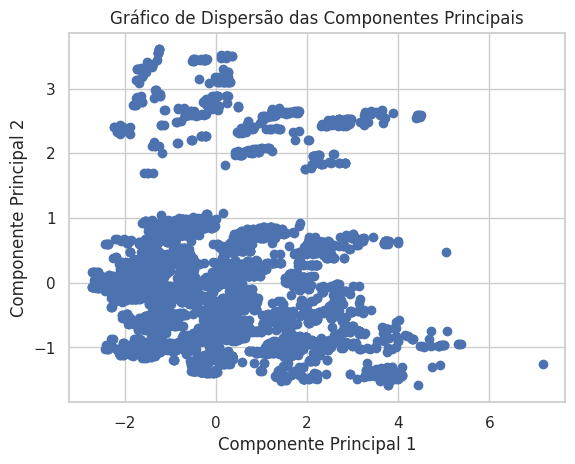

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)  # Especificar o número de componentes principais desejados
principal_components = pca.fit_transform(data_normal)

# Criar um novo DataFrame com as componentes principais
df_pca = pd.DataFrame(data = principal_components, columns=['PC1', 'PC2'])
display(df_pca)

print("\n\n")
plt.scatter(df_pca['PC1'], df_pca['PC2'])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Gráfico de Dispersão das Componentes Principais')
plt.show()

##Gráficos de análise do dataset após o pré-processamento

In [ ]:
''' encode_teste_make = encode.copy()

top_models = encode_teste_make['Make'].value_counts().head(19).index
encode_teste_make.loc[~encode_teste_make['Make'].isin(top_models), 'Make'] = 'Outros'

plt.figure(figsize=(10,5))
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=encode_teste_make["Make"], palette='tab20')
plt.show() '''

' encode_teste_make = encode.copy()\n\ntop_models = encode_teste_make[\'Make\'].value_counts().head(19).index\nencode_teste_make.loc[~encode_teste_make[\'Make\'].isin(top_models), \'Make\'] = \'Outros\'\n\nplt.figure(figsize=(10,5))\nsns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=encode_teste_make["Make"], palette=\'tab20\')\nplt.show() '

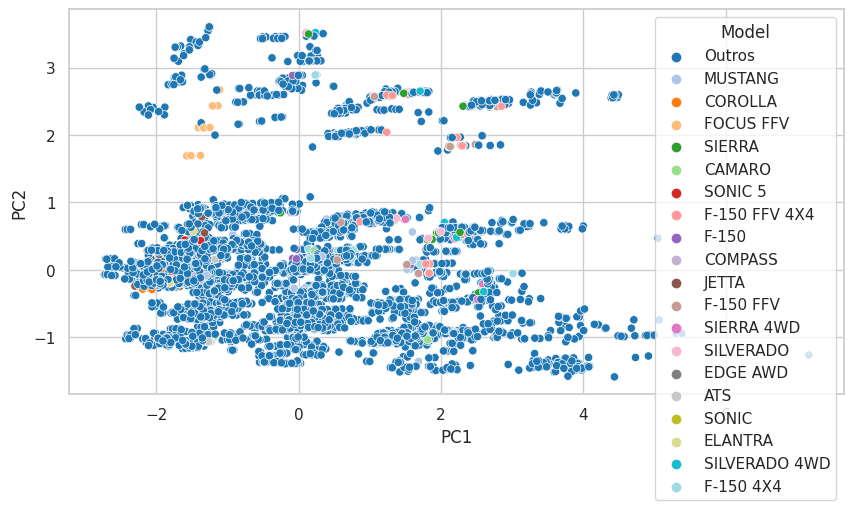

In [ ]:
encode_teste_model = encode.copy()

top_models = encode_teste_model['Model'].value_counts().head(19).index
encode_teste_model.loc[~encode_teste_model['Model'].isin(top_models), 'Model'] = 'Outros'

plt.figure(figsize=(10,5))
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=encode_teste_model["Model"], palette='tab20')
plt.show()

In [ ]:
encode["Model"].value_counts().head(15).index

Index(['MUSTANG', 'F-150 FFV', 'F-150 FFV 4X4', 'SIERRA 4WD', 'SILVERADO 4WD',
       'FOCUS FFV', 'SIERRA', 'SILVERADO', 'CAMARO', 'COROLLA', 'JETTA',
       'F-150 4X4', 'F-150', 'COMPASS', 'ELANTRA'],
      dtype='object')

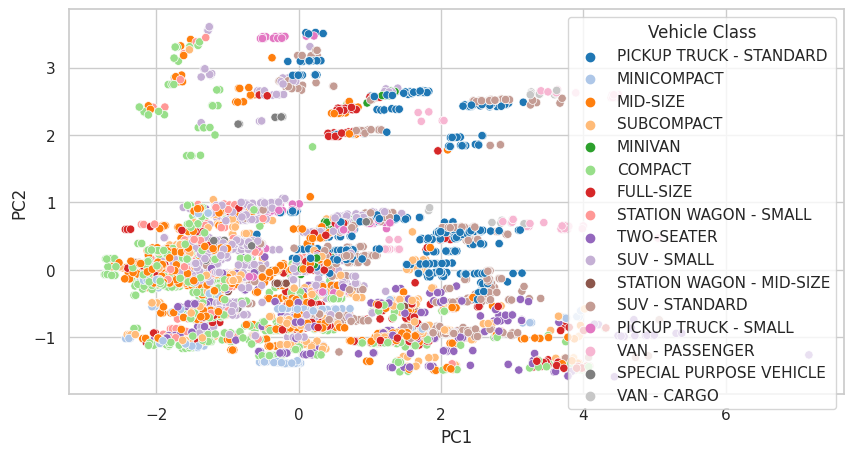

In [ ]:
''' plt.figure(figsize=(5,5))
car = encode.sample(n = 1)["Vehicle Class"]

print(car.values[0])
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue = encode["Vehicle Class"] == car.values[0], palette = 'Set2')
plt.show()
 '''
plt.figure(figsize=(10,5))
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=encode["Vehicle Class"], palette='tab20')
plt.show()

In [ ]:
data

Make  Model  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
0       33      9              6             5.7          8             3   
1       32    171              3             3.8          6             9   
2       24    889              2             3.4          6            12   
3       13    994             10             5.0          8            25   
4       39    463              2             1.8          4            25   
...    ...    ...            ...             ...        ...           ...   
5986    13    707              2             2.0          4            25   
5987    16    408              0             1.8          4            24   
5988    29    846             10             2.0          4            17   
5989    29    849              3             1.6          4            25   
5990     0   1410              0             2.4          4            25   

      Fuel Type  Fuel Consumption Comb (L/100 km)  CO2 Emissions(g/km)  
0             3                              14.8                  346  
1             4                              11.9                  274  
2             4                              11.0                  259  
3             3                              12.7                  298  
4             3                               7.5                  176  
...         ...                               ...                  ...  
5986          3                               9.2                  217  
5987          3                               7.7                  177  
5988          4                               8.1                  190  
5989          4                               8.1                  186  
5990          4                               9.8                  225  

[5991 rows x 9 columns]

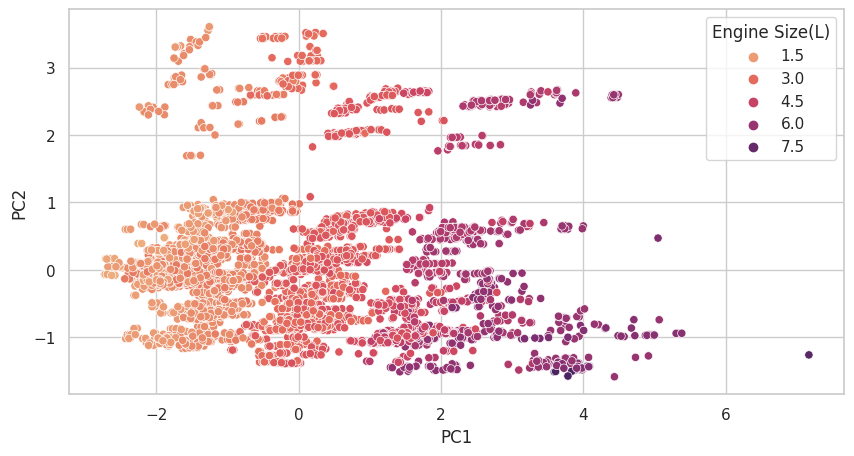

In [ ]:
plt.figure(figsize=(10,5))
c = sns.color_palette("flare", as_cmap=True)
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=data["Engine Size(L)"], palette=c)
plt.show()

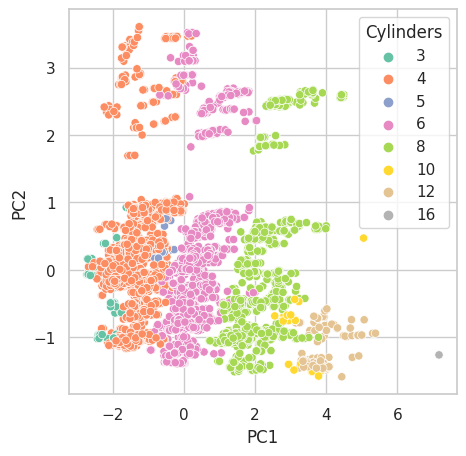

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=data["Cylinders"], palette='Set2')
plt.show()

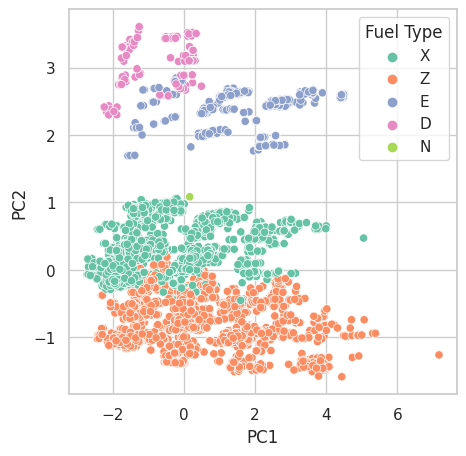

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=encode["Fuel Type"], palette='Set2')
plt.show()

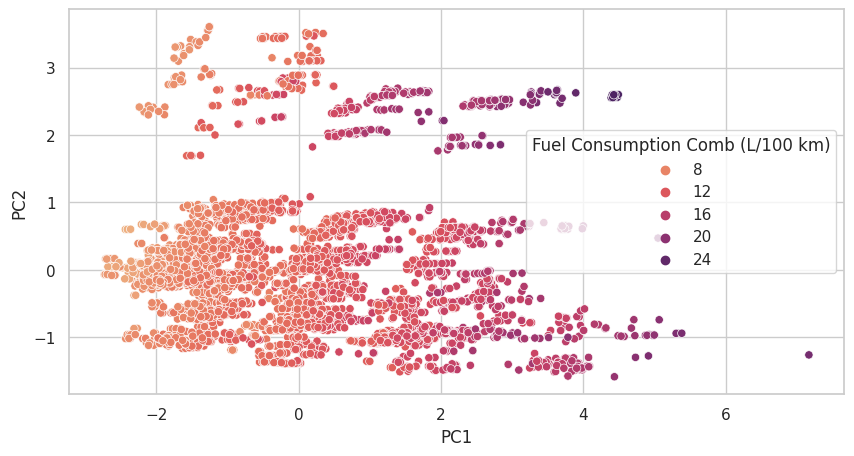

In [ ]:
plt.figure(figsize=(10,5))
c = sns.color_palette("flare", as_cmap=True)
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=data["Fuel Consumption Comb (L/100 km)"], palette=c)
plt.show()

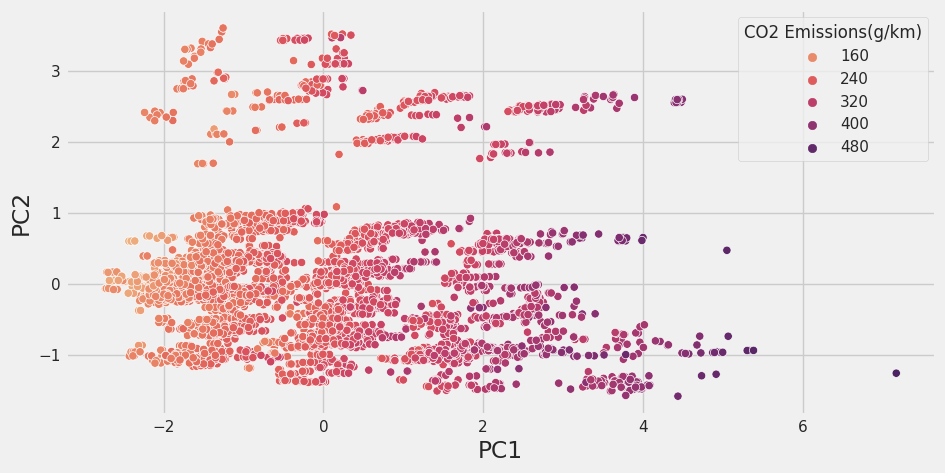

In [ ]:
plt.figure(figsize=(10,5))
c = sns.color_palette("flare", as_cmap=True)
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=data["CO2 Emissions(g/km)"], palette=c)
plt.show()

# Testes não supervisionados

## K-Means

In [ ]:
# Transformando todos os valores object em numérico
data_kmeans = data_normal.copy()
display(data_kmeans)

Make     Model  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
0     0.80 -1.001304       0.000000        1.500000        1.0     -1.333333   
1     0.75 -0.790091      -0.333333        0.444444        0.0     -0.666667   
2     0.35  0.146023      -0.444444        0.222222        0.0     -0.333333   
3    -0.20  0.282920       0.444444        1.111111        1.0      1.111111   
4     1.10 -0.409387      -0.444444       -0.666667       -1.0      1.111111   
...    ...       ...            ...             ...        ...           ...   
5986 -0.20 -0.091265      -0.444444       -0.555556       -1.0      1.111111   
5987 -0.05 -0.481095      -0.666667       -0.666667       -1.0      1.000000   
5988  0.60  0.089961       0.444444       -0.555556       -1.0      0.222222   
5989  0.60  0.093872      -0.333333       -0.777778       -1.0      1.111111   
5990 -0.85  0.825293      -0.666667       -0.333333       -1.0      1.111111   

      Fuel Type  Fuel Consumption Comb (L/100 km)  CO2 Emissions(g/km)  
0           0.0                          1.105263             1.219512  
1           1.0                          0.342105             0.341463  
2           1.0                          0.105263             0.158537  
3           0.0                          0.552632             0.634146  
4           0.0                         -0.815789            -0.853659  
...         ...                               ...                  ...  
5986        0.0                         -0.368421            -0.353659  
5987        0.0                         -0.763158            -0.841463  
5988        1.0                         -0.657895            -0.682927  
5989        1.0                         -0.657895            -0.731707  
5990        1.0                         -0.210526            -0.256098  

[5991 rows x 9 columns]

### Determinação da quantidade de clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

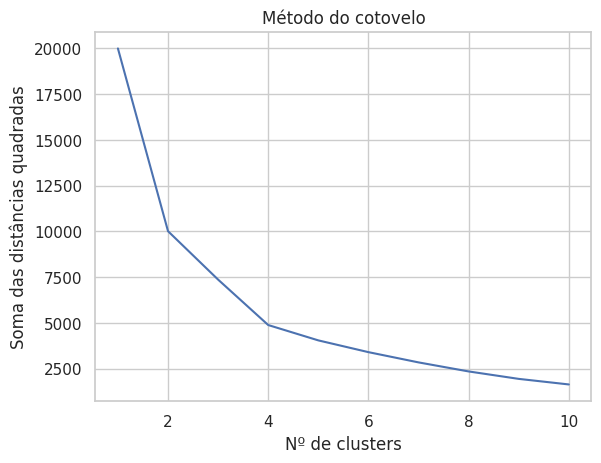

In [ ]:
# Verificando o número ideal de clusters para o k-means
from sklearn.cluster import KMeans
wcss=[] #Vamos guardar os valores das inércias calculadas (distância quadrada)

# Aqui está considerando que a quantidade máxima de clusters é 10
for i in range(1,11):
    kmeans_t = KMeans(n_clusters = i, init='k-means++', random_state=0)
    kmeans_t.fit(df_pca)
    wcss.append(kmeans_t.inertia_)


# Visualizando o método do cotovelo
plt.plot(range(1,11), wcss)
plt.title('Método do cotovelo')
plt.xlabel('Nº de clusters')
plt.ylabel('Soma das distâncias quadradas')
plt.show()

Com isso podemos definir que o número ideal de clusters é 4

## Executando

In [ ]:
# y_kmeans com base no df_pca
kmeansmodel = KMeans(n_clusters=4, init='k-means++', random_state=0, max_iter=1000)
y_kmeans= kmeansmodel.fit_predict(df_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
# Separando as linhas do dataframe de acordo com os clusters
df_y_kmeans = pd.DataFrame({'y_kmeans': y_kmeans})
df_pca['y_kmeans'] = df_y_kmeans['y_kmeans']
display(df_pca)

# Aqui precisamos colocar para juntar o df_y_kmeans com data_kmeans
data_kmeans['y_kmeans'] = df_y_kmeans['y_kmeans']
data_kmeans

encode['y_kmeans'] = df_y_kmeans['y_kmeans']
print("\nEncode\n")
display(encode)

# Colocando y_kmeans no dataframe data
datak = data.copy()
datak['y_kmeans'] = df_y_kmeans['y_kmeans']
display(datak)

PC1       PC2  y_kmeans
0     2.443961  0.377512         0
1     0.502548 -0.580756         2
2     0.197393 -0.635882         2
3     1.375450 -0.462509         0
4    -2.062880 -0.267323         1
...        ...       ...       ...
5986 -1.471484 -0.162013         1
5987 -1.943780 -0.169838         1
5988 -1.508563 -0.640879         1
5989 -1.904934 -1.054055         1
5990 -1.170093 -0.952827         1

[5991 rows x 3 columns]


Encode



Make  Make Encoded                          Model  Model Encoded  \
0         RAM            33                   1500 CLASSIC              9   
1     PORSCHE            32          911 TURBO S CABRIOLET            171   
2       LEXUS            24                     LS 500 AWD            889   
3        FORD            13                        MUSTANG            994   
4      TOYOTA            39                        COROLLA            463   
...       ...           ...                            ...            ...   
5986     FORD            13                       FOCUS ST            707   
5987    HONDA            16                          CIVIC            408   
5988     MINI            29       JOHN COOPER WORKS 3 DOOR            846   
5989     MINI            29  JOHN COOPER WORKS CONVERTIBLE            849   
5990    ACURA             0                            TSX           1410   

                Vehicle Class  Vehicle Class Encoded Transmission  \
0     PICKUP TRUCK - STANDARD                      6           A6   
1                 MINICOMPACT                      3          AM7   
2                    MID-SIZE                      2         AS10   
3                  SUBCOMPACT                     10           M6   
4                    MID-SIZE                      2           M6   
...                       ...                    ...          ...   
5986                 MID-SIZE                      2           M6   
5987                  COMPACT                      0           M5   
5988               SUBCOMPACT                     10          AS8   
5989              MINICOMPACT                      3           M6   
5990                  COMPACT                      0           M6   

      Transmission Encoded Fuel Type  Fuel Type Encoded  y_kmeans  
0                        3         X                  3         0  
1                        9         Z                  4         2  
2                       12         Z                  4         2  
3                       25         X                  3         0  
4                       25         X                  3         1  
...                    ...       ...                ...       ...  
5986                    25         X                  3         1  
5987                    24         X                  3         1  
5988                    17         Z                  4         1  
5989                    25         Z                  4         1  
5990                    25         Z                  4         1  

[5991 rows x 11 columns]

Make  Model  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
0       33      9              6             5.7          8             3   
1       32    171              3             3.8          6             9   
2       24    889              2             3.4          6            12   
3       13    994             10             5.0          8            25   
4       39    463              2             1.8          4            25   
...    ...    ...            ...             ...        ...           ...   
5986    13    707              2             2.0          4            25   
5987    16    408              0             1.8          4            24   
5988    29    846             10             2.0          4            17   
5989    29    849              3             1.6          4            25   
5990     0   1410              0             2.4          4            25   

      Fuel Type  Fuel Consumption Comb (L/100 km)  CO2 Emissions(g/km)  \
0             3                              14.8                  346   
1             4                              11.9                  274   
2             4                              11.0                  259   
3             3                              12.7                  298   
4             3                               7.5                  176   
...         ...                               ...                  ...   
5986          3                               9.2                  217   
5987          3                               7.7                  177   
5988          4                               8.1                  190   
5989          4                               8.1                  186   
5990          4                               9.8                  225   

      y_kmeans  
0            0  
1            2  
2            2  
3            0  
4            1  
...        ...  
5986         1  
5987         1  
5988         1  
5989         1  
5990         1  

[5991 rows x 10 columns]

In [ ]:
df_cluster_0 = df_pca[df_pca['y_kmeans'] == 0]
display(df_cluster_0)

PC1       PC2  y_kmeans
0     2.443961  0.377512         0
3     1.375450 -0.462509         0
8     1.554794 -1.002421         0
10    3.133530 -0.751335         0
11    2.935411 -0.179697         0
...        ...       ...       ...
5971  3.003987 -0.670024         0
5976  3.117323 -0.438364         0
5979  1.996929  0.565920         0
5980  1.821810  0.468472         0
5981  2.351248 -0.063151         0

[1136 rows x 3 columns]

In [ ]:
df_cluster_1 = df_pca[df_pca['y_kmeans'] == 1]
display(df_cluster_1)

PC1       PC2  y_kmeans
4    -2.062880 -0.267323         1
6    -1.164195 -0.392943         1
9    -1.450969 -0.120981         1
12   -1.409110  2.108238         1
14   -1.113870 -0.628037         1
...        ...       ...       ...
5986 -1.471484 -0.162013         1
5987 -1.943780 -0.169838         1
5988 -1.508563 -0.640879         1
5989 -1.904934 -1.054055         1
5990 -1.170093 -0.952827         1

[2542 rows x 3 columns]

In [ ]:
df_cluster_2 = df_pca[df_pca['y_kmeans'] == 2]
display(df_cluster_2)

PC1       PC2  y_kmeans
1     0.502548 -0.580756         2
2     0.197393 -0.635882         2
5     0.447144  0.582768         2
7     0.322574  0.143594         2
13    0.219414  0.108493         2
...        ...       ...       ...
5965  0.169688  0.170545         2
5973  0.274376 -0.855651         2
5982  0.513541  0.768309         2
5983  0.951130  0.711062         2
5985  0.205786 -0.609653         2

[1863 rows x 3 columns]

In [ ]:
df_cluster_3 = df_pca[df_pca['y_kmeans'] == 3]
display(df_cluster_3)

PC1       PC2  y_kmeans
28    1.118979  2.076749         3
48   -0.184244  2.839416         3
57    1.097174  2.556956         3
75    2.524672  1.863437         3
113   1.032465  2.522147         3
...        ...       ...       ...
5885  1.477399  2.618747         3
5908  1.318133  2.585922         3
5909  2.428777  2.442200         3
5910  0.149882  3.099051         3
5943 -1.315741  2.980740         3

[450 rows x 3 columns]

In [ ]:
''' import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Criar figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotar gráfico de dispersão tridimensional
ax.scatter(df_cluster_0['Engine Size(L)'], df_cluster_0['Fuel Consumption Comb (L/100 km)'], df_cluster_0['CO2 Emissions(g/km)'], c='r', marker='o')
ax.scatter(df_cluster_1['Engine Size(L)'], df_cluster_1['Fuel Consumption Comb (L/100 km)'], df_cluster_1['CO2 Emissions(g/km)'], c='b', marker='o')
ax.scatter(df_cluster_2['Engine Size(L)'], df_cluster_2['Fuel Consumption Comb (L/100 km)'], df_cluster_2['CO2 Emissions(g/km)'], c='g', marker='o')

# Definir rótulos dos eixos
ax.set_xlabel('Eixo X')
ax.set_ylabel('Eixo Y')
ax.set_zlabel('Eixo Z')

# Exibir o gráfico
plt.show() '''

" import pandas as pd\nimport matplotlib.pyplot as plt\nfrom mpl_toolkits.mplot3d import Axes3D\n\n# Criar figura 3D\nfig = plt.figure()\nax = fig.add_subplot(111, projection='3d')\n\n# Plotar gráfico de dispersão tridimensional\nax.scatter(df_cluster_0['Engine Size(L)'], df_cluster_0['Fuel Consumption Comb (L/100 km)'], df_cluster_0['CO2 Emissions(g/km)'], c='r', marker='o')\nax.scatter(df_cluster_1['Engine Size(L)'], df_cluster_1['Fuel Consumption Comb (L/100 km)'], df_cluster_1['CO2 Emissions(g/km)'], c='b', marker='o')\nax.scatter(df_cluster_2['Engine Size(L)'], df_cluster_2['Fuel Consumption Comb (L/100 km)'], df_cluster_2['CO2 Emissions(g/km)'], c='g', marker='o')\n\n# Definir rótulos dos eixos\nax.set_xlabel('Eixo X')\nax.set_ylabel('Eixo Y')\nax.set_zlabel('Eixo Z')\n\n# Exibir o gráfico\nplt.show() "

### Gráfico

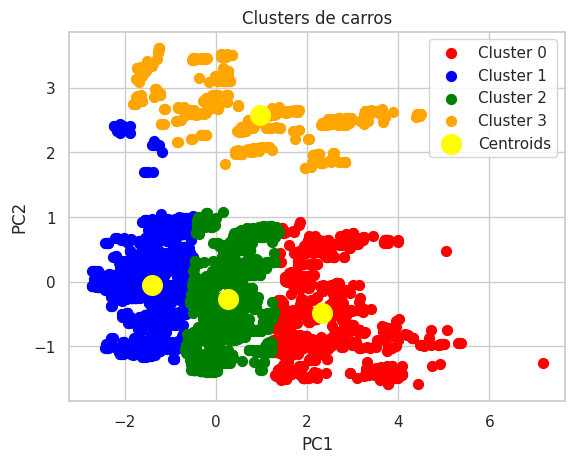

In [ ]:
# Gerando a parte visual
plt.scatter(df_cluster_0['PC1'], df_cluster_0['PC2'], s = 50, c = 'red', label = 'Cluster 0')
plt.scatter(df_cluster_1['PC1'], df_cluster_1['PC2'], s = 50, c = 'blue', label = 'Cluster 1')
plt.scatter(df_cluster_2['PC1'], df_cluster_2['PC2'], s = 50, c = 'green', label = 'Cluster 2')
plt.scatter(df_cluster_3['PC1'], df_cluster_3['PC2'], s = 50, c = 'orange', label = 'Cluster 3')
plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters de carros')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

Gráfico de consumo de combustível

In [ ]:
# Separando os dados originais de acordo com o cluster que ele pertence
data_cluster_0 = datak[datak['y_kmeans'] == 0]
data_cluster_1 = datak[datak['y_kmeans'] == 1]
data_cluster_2 = datak[datak['y_kmeans'] == 2]
data_cluster_3 = datak[datak['y_kmeans'] == 3]

display(data_cluster_0)
display(data_cluster_1)
display(data_cluster_2)
display(data_cluster_3)

Make  Model  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
0       33      9              6             5.7          8             3   
3       13    994             10             5.0          8            25   
8       26   1103              1             3.8          8            17   
10      22    812             13             5.2         10             9   
11       9   1302              6             6.2          8             0   
...    ...    ...            ...             ...        ...           ...   
5971     3   1117             13             5.2         10             9   
5976     3   1119             13             5.2         10             4   
5979     9   1300              6             5.3          8             3   
5980     9   1300              6             5.3          8             5   
5981    39   1421              6             5.7          8            15   

      Fuel Type  Fuel Consumption Comb (L/100 km)  CO2 Emissions(g/km)  \
0             3                              14.8                  346   
3             3                              12.7                  298   
8             4                              14.5                  334   
10            4                              15.7                  370   
11            4                              15.2                  357   
...         ...                               ...                  ...   
5971          4                              14.9                  347   
5976          4                              14.8                  347   
5979          3                              12.7                  298   
5980          3                              12.2                  286   
5981          3                              15.4                  360   

      y_kmeans  
0            0  
3            0  
8            0  
10           0  
11           0  
...        ...  
5971         0  
5976         0  
5979         0  
5980         0  
5981         0  

[1136 rows x 10 columns]

Make  Model  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
4       39    463              2             1.8          4            25   
6       28    235              0             2.0          4             9   
9       31   1101              9             2.0          4            25   
12      13    704              0             2.0          4            15   
14       5     78             10             2.0          4            17   
...    ...    ...            ...             ...        ...           ...   
5986    13    707              2             2.0          4            25   
5987    16    408              0             1.8          4            24   
5988    29    846             10             2.0          4            17   
5989    29    849              3             1.6          4            25   
5990     0   1410              0             2.4          4            25   

      Fuel Type  Fuel Consumption Comb (L/100 km)  CO2 Emissions(g/km)  \
4             3                               7.5                  176   
6             4                               9.2                  217   
9             3                               9.2                  216   
12            1                              10.3                  165   
14            4                               9.6                  221   
...         ...                               ...                  ...   
5986          3                               9.2                  217   
5987          3                               7.7                  177   
5988          4                               8.1                  190   
5989          4                               8.1                  186   
5990          4                               9.8                  225   

      y_kmeans  
4            1  
6            1  
9            1  
12           1  
14           1  
...        ...  
5986         1  
5987         1  
5988         1  
5989         1  
5990         1  

[2542 rows x 10 columns]

Make  Model  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
1       32    171              3             3.8          6             9   
2       24    889              2             3.4          6            12   
5       10   1031              4             3.6          6             6   
7        7    869              2             3.6          6            15   
13       8    504              2             3.6          6            15   
...    ...    ...            ...             ...        ...           ...   
5965    13    652              6             2.7          6            15   
5973    14    728              1             3.3          6            17   
5982    16   1064             11             3.5          6             3   
5983    25    980              7             3.7          6             3   
5985    32    156              3             3.0          6            10   

      Fuel Type  Fuel Consumption Comb (L/100 km)  CO2 Emissions(g/km)  \
1             4                              11.9                  274   
2             4                              11.0                  259   
5             3                              10.9                  257   
7             3                              11.4                  268   
13            3                              11.2                  258   
...         ...                               ...                  ...   
5965          3                              11.7                  275   
5973          4                              11.8                  280   
5982          3                              10.8                  253   
5983          3                              12.7                  297   
5985          4                              11.5                  271   

      y_kmeans  
1            2  
2            2  
5            2  
7            2  
13           2  
...        ...  
5965         2  
5973         2  
5982         2  
5983         2  
5985         2  

[1863 rows x 10 columns]

Make  Model  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
28      13    637             12             3.5          6            15   
48      15   1378             11             2.4          4             3   
57      11    391              1             3.6          6             2   
75      13    660              6             5.0          8            15   
113     11    552             12             3.6          6             5   
...    ...    ...            ...             ...        ...           ...   
5885    15   1289              6             4.3          6             3   
5908    13    660              6             3.5          6             3   
5909     9   1308              6             5.3          8             3   
5910    33     16              6             3.0          6             5   
5943     5   1485             11             2.0          4            17   

      Fuel Type  Fuel Consumption Comb (L/100 km)  CO2 Emissions(g/km)  \
28            1                              17.2                  282   
48            1                              13.4                  221   
57            1                              15.9                  264   
75            1                              19.9                  318   
113           1                              15.6                  250   
...         ...                               ...                  ...   
5885          1                              16.8                  269   
5908          1                              16.9                  281   
5909          1                              17.1                  283   
5910          0                              10.2                  272   
5943          0                               8.0                  211   

      y_kmeans  
28           3  
48           3  
57           3  
75           3  
113          3  
...        ...  
5885         3  
5908         3  
5909         3  
5910         3  
5943         3  

[450 rows x 10 columns]

In [ ]:
data_cluster_0.describe()

Make        Model  Vehicle Class  Engine Size(L)    Cylinders  \
count  1136.000000  1136.000000    1136.000000     1136.000000  1136.000000   
mean     16.466549   882.703345       7.619718        5.327289     8.503521   
std      10.192280   453.757032       4.970726        0.792528     1.364104   
min       2.000000     1.000000       0.000000        3.500000     6.000000   
25%       9.000000   466.000000       2.000000        4.700000     8.000000   
50%      15.000000   922.000000      10.000000        5.300000     8.000000   
75%      28.000000  1294.000000      12.000000        6.000000     8.000000   
max      39.000000  1590.000000      15.000000        8.400000    16.000000   

       Transmission    Fuel Type  Fuel Consumption Comb (L/100 km)  \
count   1136.000000  1136.000000                       1136.000000   
mean      11.125880     3.682218                         14.413292   
std        7.108164     0.465819                          1.769504   
min        0.000000     3.000000                         11.200000   
25%        5.000000     3.000000                         13.100000   
50%       10.000000     4.000000                         14.000000   
75%       17.000000     4.000000                         15.325000   
max       26.000000     4.000000                         22.200000   

       CO2 Emissions(g/km)  y_kmeans  
count          1136.000000    1136.0  
mean            335.550176       0.0  
std              40.404204       0.0  
min             258.000000       0.0  
25%             305.000000       0.0  
50%             327.000000       0.0  
75%             357.000000       0.0  
max             522.000000       0.0

In [ ]:
data_cluster_1.describe()

Make        Model  Vehicle Class  Engine Size(L)    Cylinders  \
count  2542.000000  2542.000000    2542.000000     2542.000000  2542.000000   
mean     21.904406   790.551534       5.568843        1.978206     3.989772   
std      11.858004   424.503720       4.816812        0.365909     0.259972   
min       0.000000     0.000000       0.000000        0.900000     3.000000   
25%      13.000000   451.250000       1.000000        1.800000     4.000000   
50%      21.000000   763.000000       3.000000        2.000000     4.000000   
75%      30.000000  1161.000000      11.000000        2.000000     4.000000   
max      41.000000  1593.000000      13.000000        3.500000     6.000000   

       Transmission    Fuel Type  Fuel Consumption Comb (L/100 km)  \
count    2542.00000  2542.000000                       2542.000000   
mean       16.81786     3.315106                          8.681589   
std         6.57487     0.539870                          1.249815   
min         1.00000     0.000000                          4.100000   
25%        15.00000     3.000000                          7.900000   
50%        17.00000     3.000000                          8.700000   
75%        24.00000     4.000000                          9.500000   
max        25.00000     4.000000                         12.300000   

       CO2 Emissions(g/km)  y_kmeans  
count          2542.000000    2542.0  
mean            201.976790       1.0  
std              28.924562       0.0  
min              96.000000       1.0  
25%             184.000000       1.0  
50%             204.000000       1.0  
75%             221.000000       1.0  
max             283.000000       1.0

In [ ]:
data_cluster_2.describe()

Make        Model  Vehicle Class  Engine Size(L)    Cylinders  \
count  1863.000000  1863.000000    1863.000000     1863.000000  1863.000000   
mean     18.731616   744.311863       6.358561        3.354750     6.000000   
std      11.478505   456.083559       4.676339        0.437437     0.589015   
min       0.000000     1.000000       0.000000        2.000000     4.000000   
25%       8.000000   332.500000       2.000000        3.000000     6.000000   
50%      18.000000   730.000000       6.000000        3.500000     6.000000   
75%      28.000000  1104.500000      11.000000        3.600000     6.000000   
max      41.000000  1595.000000      15.000000        5.500000     8.000000   

       Transmission    Fuel Type  Fuel Consumption Comb (L/100 km)  \
count   1863.000000  1863.000000                       1863.000000   
mean      13.556629     3.542673                         11.352925   
std        6.678668     0.499386                          1.135782   
min        1.000000     2.000000                          7.700000   
25%        9.000000     3.000000                         10.600000   
50%       15.000000     4.000000                         11.300000   
75%       17.000000     4.000000                         12.100000   
max       26.000000     4.000000                         15.100000   

       CO2 Emissions(g/km)  y_kmeans  
count          1863.000000    1863.0  
mean            264.359098       2.0  
std              26.707900       0.0  
min             177.000000       2.0  
25%             246.000000       2.0  
50%             262.000000       2.0  
75%             281.000000       2.0  
max             353.000000       2.0

In [ ]:
data_cluster_3.describe()

Make        Model  Vehicle Class  Engine Size(L)   Cylinders  \
count  450.000000   450.000000     450.000000      450.000000  450.000000   
mean    14.460000   841.140000       7.360000        3.732000    6.160000   
std      7.818341   482.821312       4.354983        1.212885    1.489742   
min      3.000000     5.000000       0.000000        1.600000    4.000000   
25%      9.000000   535.000000       5.000000        3.000000    6.000000   
50%     13.000000   704.000000       6.000000        3.600000    6.000000   
75%     15.000000  1303.000000      12.000000        5.000000    8.000000   
max     40.000000  1590.000000      15.000000        6.200000    8.000000   

       Transmission   Fuel Type  Fuel Consumption Comb (L/100 km)  \
count    450.000000  450.000000                        450.000000   
mean       7.824444    0.700000                         14.674000   
std        5.835749    0.458768                          4.548077   
min        0.000000    0.000000                          6.400000   
25%        3.000000    0.000000                         10.400000   
50%        5.000000    1.000000                         15.800000   
75%       15.000000    1.000000                         17.800000   
max       17.000000    1.000000                         26.100000   

       CO2 Emissions(g/km)  y_kmeans  
count           450.000000     450.0  
mean            267.673333       3.0  
std              47.986426       0.0  
min             162.000000       3.0  
25%             235.000000       3.0  
50%             270.000000       3.0  
75%             294.000000       3.0  
max             418.000000       3.0

In [ ]:
''' # data_describe_0 = data_kmeans_cluster_0.describe()
# nome_propriedade  = mean
def gerar_grafico_colunas_propriedade(describe_cluster_especifico, nome_propriedade, nome_cluster):
  media = describe_cluster_especifico.loc[nome_propriedade]

  media_co2_emissions = media['CO2 Emissions(g/km)']

  media = media.drop('Make', axis=0)
  media = media.drop('Model', axis=0)
  media = media.drop('Vehicle Class', axis=0)
  media = media.drop('Fuel Type', axis=0)
  media = media.drop('y_kmeans', axis=0)
  media = media.drop('CO2 Emissions(g/km)', axis=0)

  # Criando um gráfico de barras
  plt.figure(figsize=(15, 5))
  bars = media.plot(kind='bar')
  plt.title('Valores Médios das Colunas - ' + nome_cluster)
  plt.ylabel('Valores Médios')
  plt.xlabel('Colunas')

  for bar in bars.patches:
      plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.3f}',
              ha='center', va='bottom')

  plt.xticks(rotation=0)
  plt.show()

  print('\n')

  plt.figure(figsize=(6, 4))
  plt.bar(4, media_co2_emissions, align='center')
  plt.title('Média CO2 Emissions(g/km) - ' + nome_cluster)
  plt.ylabel('Valor Médio')
  plt.xlabel('')
  plt.ylim(0, 500)
  plt.xlim(0, 9)
  plt.xticks([4], ['CO2 Emissions(g/km)'])
  plt.show() '''

" # data_describe_0 = data_kmeans_cluster_0.describe()\n# nome_propriedade  = mean\ndef gerar_grafico_colunas_propriedade(describe_cluster_especifico, nome_propriedade, nome_cluster):\n  media = describe_cluster_especifico.loc[nome_propriedade]\n\n  media_co2_emissions = media['CO2 Emissions(g/km)']\n\n  media = media.drop('Make', axis=0)\n  media = media.drop('Model', axis=0)\n  media = media.drop('Vehicle Class', axis=0)\n  media = media.drop('Fuel Type', axis=0)\n  media = media.drop('y_kmeans', axis=0)\n  media = media.drop('CO2 Emissions(g/km)', axis=0)\n\n  # Criando um gráfico de barras\n  plt.figure(figsize=(15, 5))\n  bars = media.plot(kind='bar')\n  plt.title('Valores Médios das Colunas - ' + nome_cluster)\n  plt.ylabel('Valores Médios')\n  plt.xlabel('Colunas')\n\n  for bar in bars.patches:\n      plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.3f}',\n              ha='center', va='bottom')\n\n  plt.xticks(rotation=0)\n  plt.show()\n\n  pri

In [ ]:
props = data_cluster_1.describe().loc['mean']
props

Make                                 21.904406
Model                               790.551534
Vehicle Class                         5.568843
Engine Size(L)                        1.978206
Cylinders                             3.989772
Transmission                         16.817860
Fuel Type                             3.315106
Fuel Consumption Comb (L/100 km)      8.681589
CO2 Emissions(g/km)                 201.976790
y_kmeans                              1.000000
Name: mean, dtype: float64

In [ ]:
def gerar_grafico_clusters_propriedades(clusters, nome_propriedade):
  propriedade0 = clusters[0].loc[nome_propriedade]
  propriedade0 = propriedade0.drop('y_kmeans', axis=0)

  propriedade1 = clusters[1].loc[nome_propriedade]
  propriedade1 = propriedade1.drop('y_kmeans', axis=0)

  propriedade2 = clusters[2].loc[nome_propriedade]
  propriedade2 = propriedade2.drop('y_kmeans', axis=0)

  propriedade3 = clusters[3].loc[nome_propriedade]
  propriedade3 = propriedade3.drop('y_kmeans', axis=0)

  for chave, valor in propriedade0.items():
    print(chave)
    posicoes = np.arange(1)

    # Largura das barras
    largura_barra = 0.2  # Largura das barras (espaçamento controlado aqui)
    plt.figure(figsize=(8, 6), facecolor='white')


    print("Valor cluster 0: " + str(propriedade0[chave]))
    print("Valor cluster 1: " + str(propriedade1[chave]))
    print("Valor cluster 2: " + str(propriedade2[chave]))
    print("Valor cluster 3: " + str(propriedade3[chave]))

    plt.bar(posicoes - largura_barra - 0.5*largura_barra, [propriedade0[chave]], width=largura_barra, label='Cluster 0', align='center')
    plt.bar(posicoes, [propriedade1[chave]], width=largura_barra, label='Cluster 1', align='center')
    plt.bar(posicoes + largura_barra + 0.5*largura_barra, [propriedade2[chave]], width=largura_barra, label='Cluster 2', align='center')
    plt.bar(posicoes + 2*(largura_barra + 0.5*largura_barra), [propriedade3[chave]], width=largura_barra, label='Cluster 3', align='center')

    plt.text(posicoes - largura_barra - 0.5*largura_barra, propriedade0[chave] + 0.1, "{:.2f}".format(propriedade0[chave]), ha='center', va='bottom', fontsize=10)
    plt.text(posicoes, propriedade1[chave] + 0.1, "{:.2f}".format(propriedade1[chave]) , ha='center', va='bottom', fontsize=10)
    plt.text(posicoes + largura_barra + 0.5*largura_barra, propriedade2[chave] + 0.1, "{:.2f}".format(propriedade2[chave]) , ha='center', va='bottom', fontsize=10)
    plt.text(posicoes + 2*(largura_barra + 0.5*largura_barra), propriedade3[chave] + 0.1, "{:.2f}".format(propriedade3[chave]) , ha='center', va='bottom', fontsize=10)

    plt.ylabel('Valores')
    plt.title(nome_propriedade.upper() + ' - ' + chave)
    plt.xlim(-2, 2)
    plt.xticks(posicoes, [chave])
    plt.legend()
    plt.show()

Make
Valor cluster 0: 16.466549295774648
Valor cluster 1: 21.904405979543668
Valor cluster 2: 18.731615673644658
Valor cluster 3: 14.46


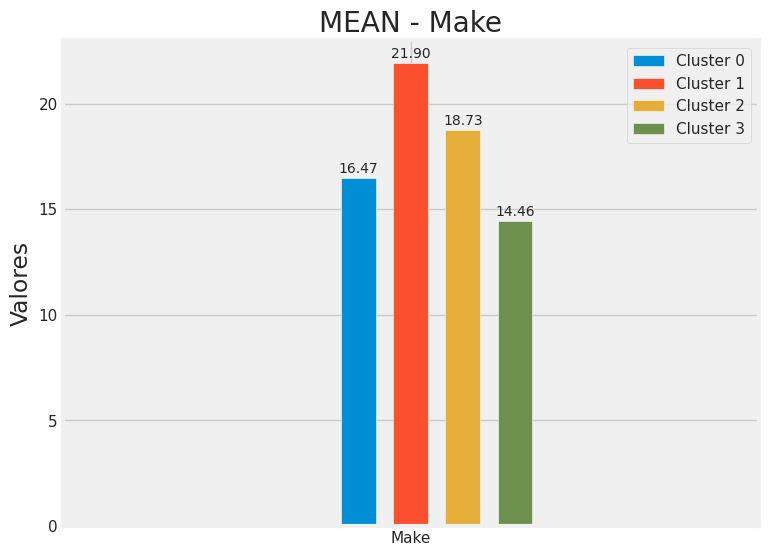

Model
Valor cluster 0: 882.7033450704225
Valor cluster 1: 790.5515342250196
Valor cluster 2: 744.3118625872249
Valor cluster 3: 841.14


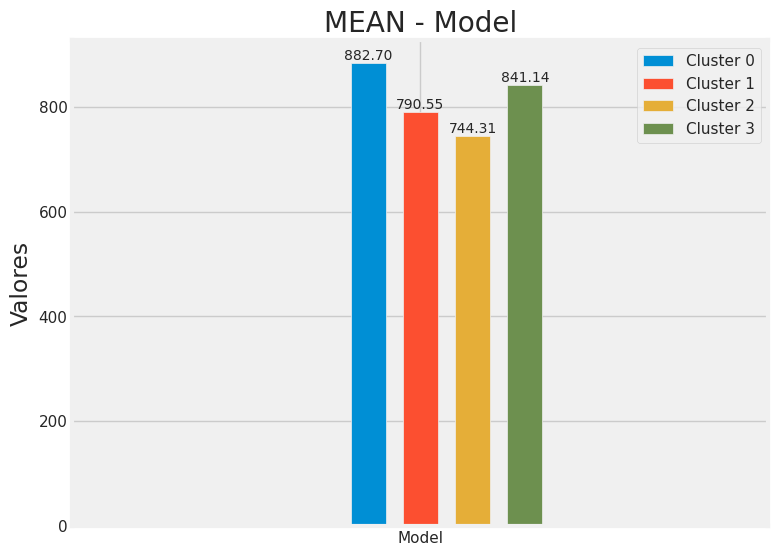

Vehicle Class
Valor cluster 0: 7.619718309859155
Valor cluster 1: 5.568843430369787
Valor cluster 2: 6.358561460010735
Valor cluster 3: 7.36


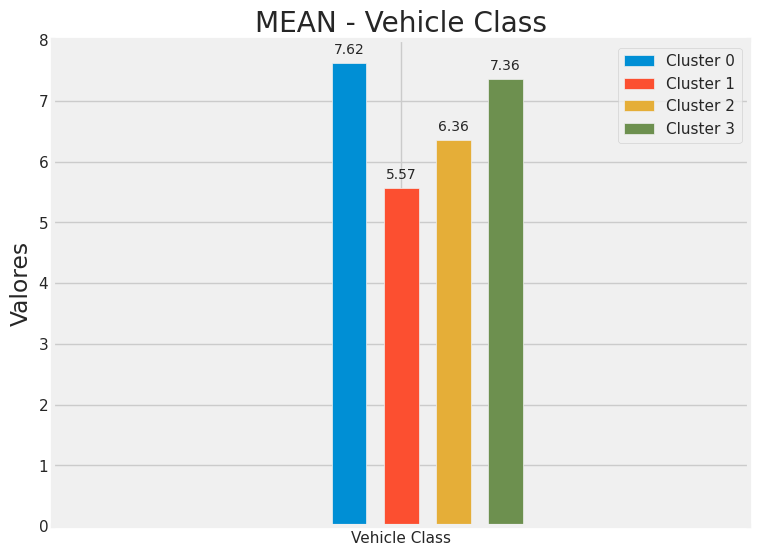

Engine Size(L)
Valor cluster 0: 5.327288732394367
Valor cluster 1: 1.9782061369000787
Valor cluster 2: 3.354750402576489
Valor cluster 3: 3.7319999999999998


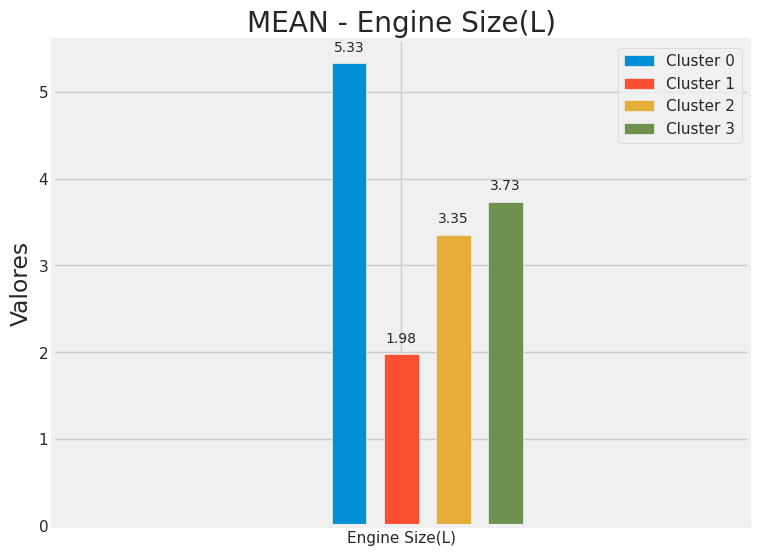

Cylinders
Valor cluster 0: 8.503521126760564
Valor cluster 1: 3.989771833202203
Valor cluster 2: 6.0
Valor cluster 3: 6.16


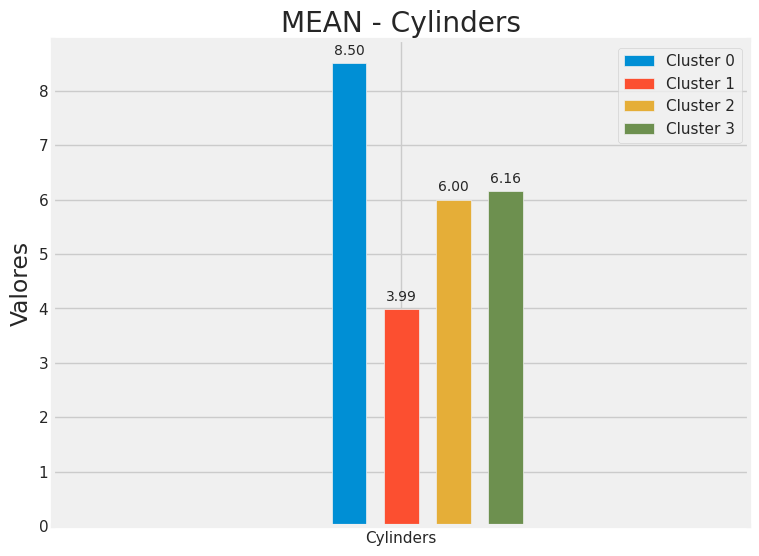

Transmission
Valor cluster 0: 11.12588028169014
Valor cluster 1: 16.817859952793075
Valor cluster 2: 13.556629092860977
Valor cluster 3: 7.8244444444444445


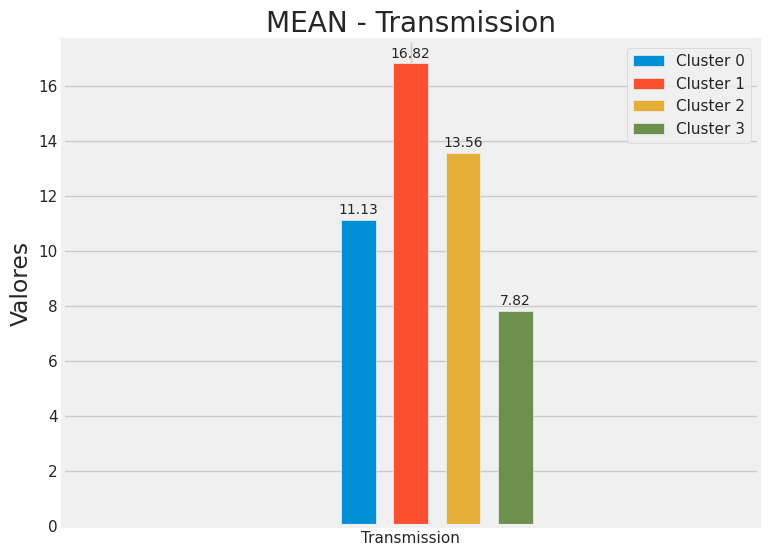

Fuel Type
Valor cluster 0: 3.682218309859155
Valor cluster 1: 3.3151062155782847
Valor cluster 2: 3.5426731078904994
Valor cluster 3: 0.7


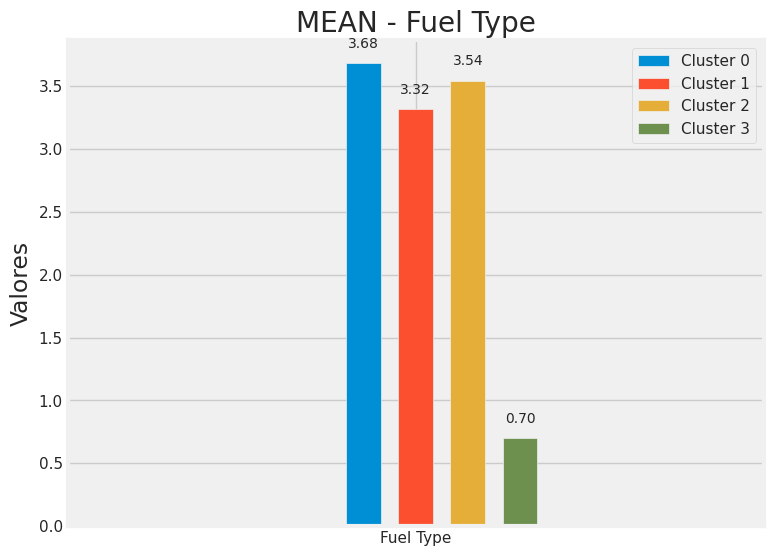

Fuel Consumption Comb (L/100 km)
Valor cluster 0: 14.413292253521126
Valor cluster 1: 8.681589299763965
Valor cluster 2: 11.352925389157273
Valor cluster 3: 14.674000000000001


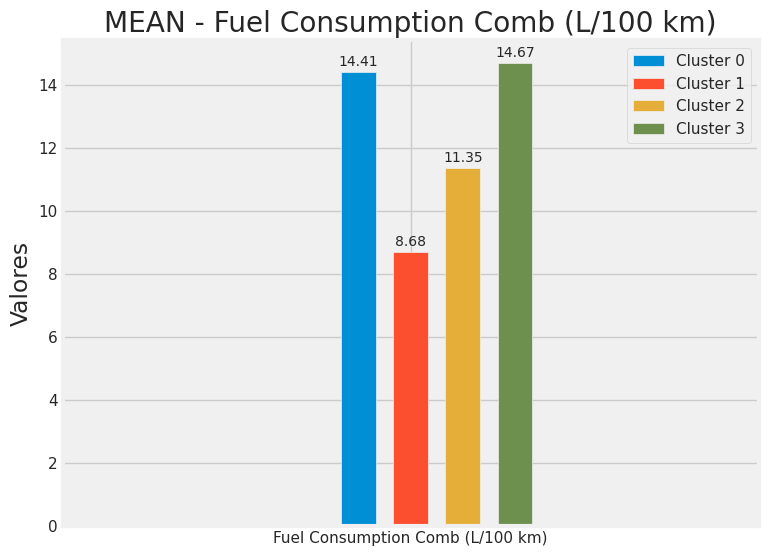

CO2 Emissions(g/km)
Valor cluster 0: 335.55017605633805
Valor cluster 1: 201.9767899291896
Valor cluster 2: 264.35909822866347
Valor cluster 3: 267.67333333333335


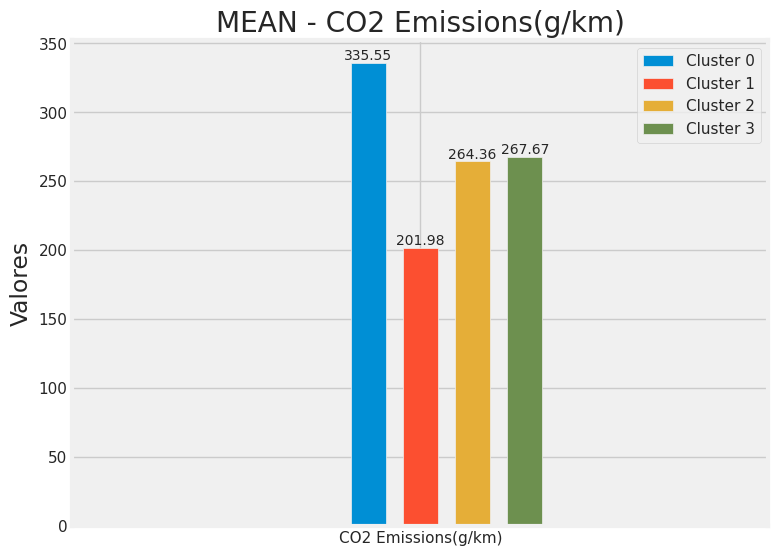

In [ ]:
gerar_grafico_clusters_propriedades([data_cluster_0.describe(),
                                     data_cluster_1.describe(),
                                     data_cluster_2.describe(),
                                     data_cluster_3.describe()], 'mean')

In [ ]:
#gerar_grafico_colunas_propriedade(data_kmeans_cluster_0.describe(), 'mean', 'Cluster 0')
#gerar_grafico_colunas_propriedade(data_kmeans_cluster_0.describe(), '75%', 'Cluster 0')
datak[datak['y_kmeans'] == 1].describe()

Make        Model  Vehicle Class  Engine Size(L)    Cylinders  \
count  2542.000000  2542.000000    2542.000000     2542.000000  2542.000000   
mean     21.904406   790.551534       5.568843        1.978206     3.989772   
std      11.858004   424.503720       4.816812        0.365909     0.259972   
min       0.000000     0.000000       0.000000        0.900000     3.000000   
25%      13.000000   451.250000       1.000000        1.800000     4.000000   
50%      21.000000   763.000000       3.000000        2.000000     4.000000   
75%      30.000000  1161.000000      11.000000        2.000000     4.000000   
max      41.000000  1593.000000      13.000000        3.500000     6.000000   

       Transmission    Fuel Type  Fuel Consumption Comb (L/100 km)  \
count    2542.00000  2542.000000                       2542.000000   
mean       16.81786     3.315106                          8.681589   
std         6.57487     0.539870                          1.249815   
min         1.00000     0.000000                          4.100000   
25%        15.00000     3.000000                          7.900000   
50%        17.00000     3.000000                          8.700000   
75%        24.00000     4.000000                          9.500000   
max        25.00000     4.000000                         12.300000   

       CO2 Emissions(g/km)  y_kmeans  
count          2542.000000    2542.0  
mean            201.976790       1.0  
std              28.924562       0.0  
min              96.000000       1.0  
25%             184.000000       1.0  
50%             204.000000       1.0  
75%             221.000000       1.0  
max             283.000000       1.0

In [ ]:
def gerar_grafico_atributos_categoricos(cluster, coluna, nome_cluster):

  labels = cluster[coluna].value_counts().index
  values = cluster[coluna].value_counts().values


  plt.style.use('fivethirtyeight')
  plt.figure(figsize=(20, 10))
  plt.subplot(1, 2, 1)
  sns.countplot(x=cluster[coluna], data=cluster)
  plt.subplot(1, 2, 2)
  plt.pie(values, labels=labels, autopct='%1.1f%%')
  plt.title(nome_cluster + " - " + coluna)
  plt.tight_layout()
  plt.savefig('Image')
  plt.show()

In [ ]:
data_cluster_2

Make  Model  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
1       32    171              3             3.8          6             9   
2       24    889              2             3.4          6            12   
5       10   1031              4             3.6          6             6   
7        7    869              2             3.6          6            15   
13       8    504              2             3.6          6            15   
...    ...    ...            ...             ...        ...           ...   
5965    13    652              6             2.7          6            15   
5973    14    728              1             3.3          6            17   
5982    16   1064             11             3.5          6             3   
5983    25    980              7             3.7          6             3   
5985    32    156              3             3.0          6            10   

      Fuel Type  Fuel Consumption Comb (L/100 km)  CO2 Emissions(g/km)  \
1             4                              11.9                  274   
2             4                              11.0                  259   
5             3                              10.9                  257   
7             3                              11.4                  268   
13            3                              11.2                  258   
...         ...                               ...                  ...   
5965          3                              11.7                  275   
5973          4                              11.8                  280   
5982          3                              10.8                  253   
5983          3                              12.7                  297   
5985          4                              11.5                  271   

      y_kmeans  
1            2  
2            2  
5            2  
7            2  
13           2  
...        ...  
5965         2  
5973         2  
5982         2  
5983         2  
5985         2  

[1863 rows x 10 columns]

#### Médiana dos dados numéricos

In [ ]:
def mostrar_medianas():
  colunas = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)']

  print("Medianas\n")
  for coluna in colunas:
    print("Coluna: " + coluna)
    print("Cluster 0: " + str(data_cluster_0[coluna].median()))
    print("Cluster 1: " + str(data_cluster_1[coluna].median()))
    print("Cluster 2: " + str(data_cluster_2[coluna].median()))
    print("\n")

In [ ]:
mostrar_medianas()

Medianas

Coluna: Engine Size(L)
Cluster 0: 5.3
Cluster 1: 2.0
Cluster 2: 3.5


Coluna: Cylinders
Cluster 0: 8.0
Cluster 1: 4.0
Cluster 2: 6.0


Coluna: Fuel Consumption Comb (L/100 km)
Cluster 0: 14.0
Cluster 1: 8.7
Cluster 2: 11.3


Coluna: CO2 Emissions(g/km)
Cluster 0: 327.0
Cluster 1: 204.0
Cluster 2: 262.0




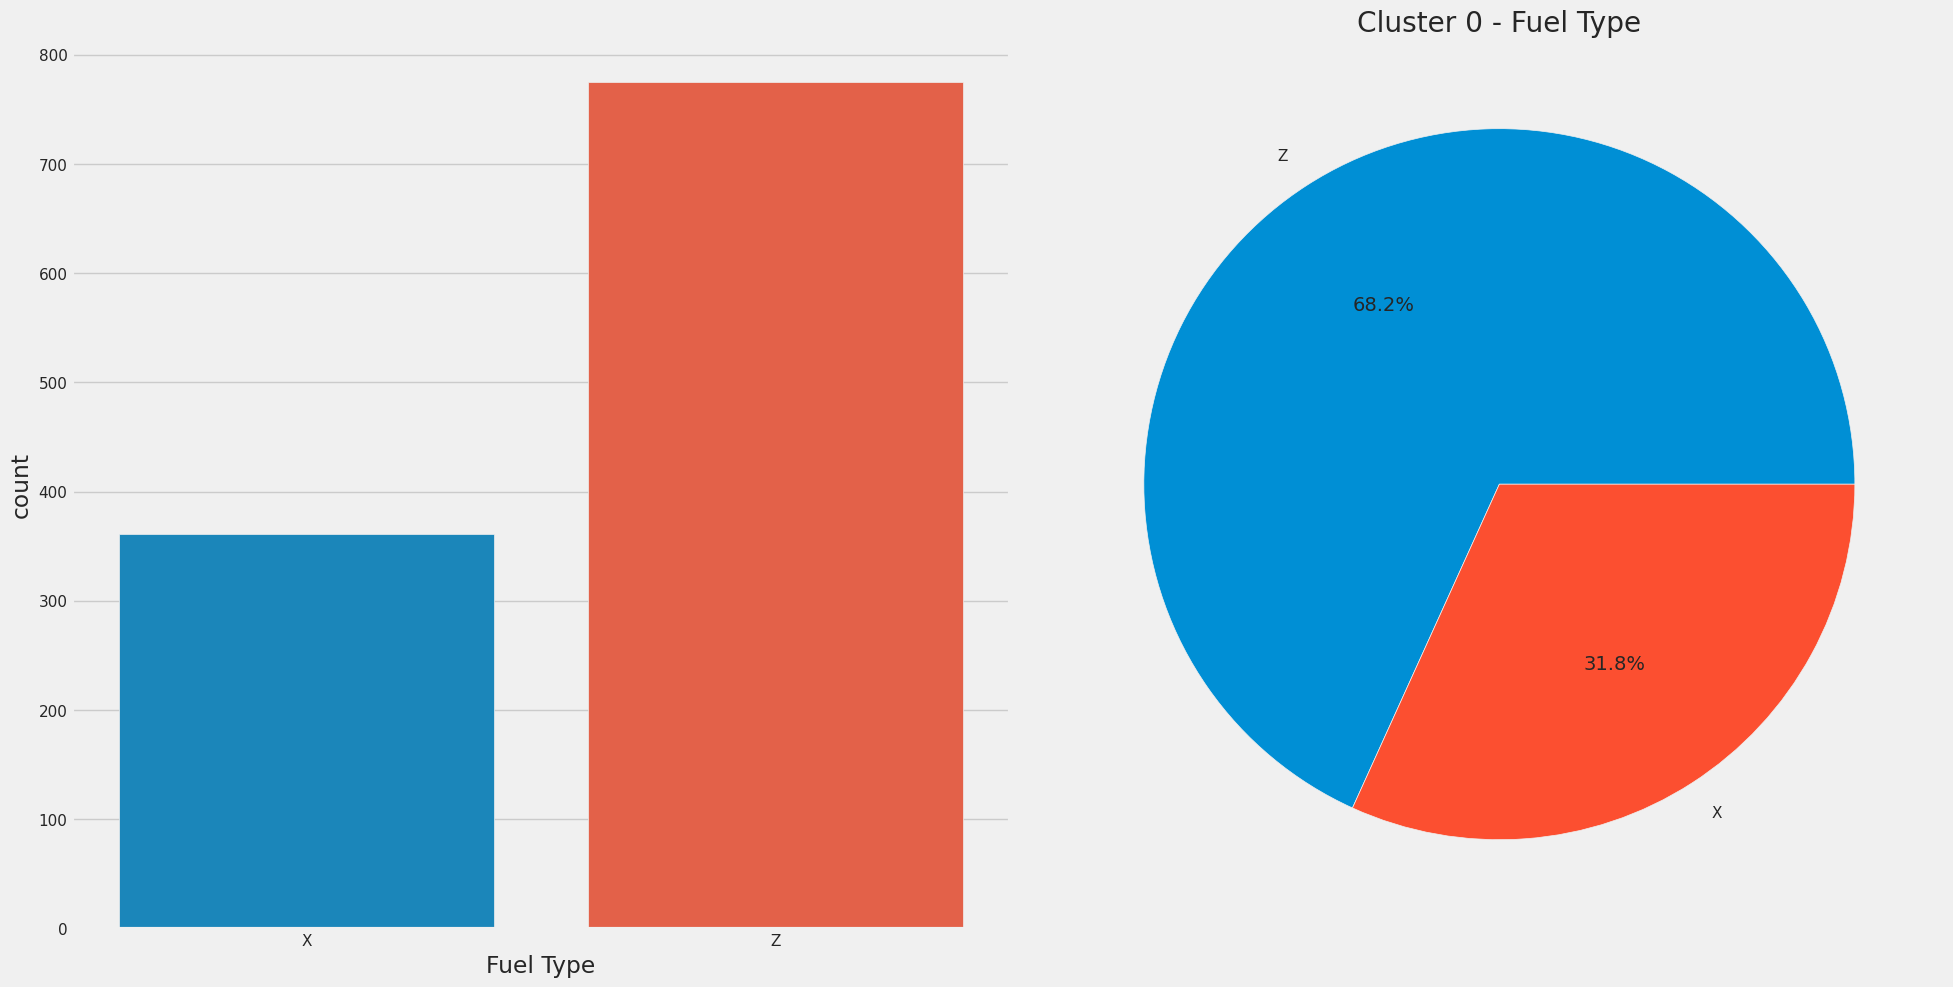

None

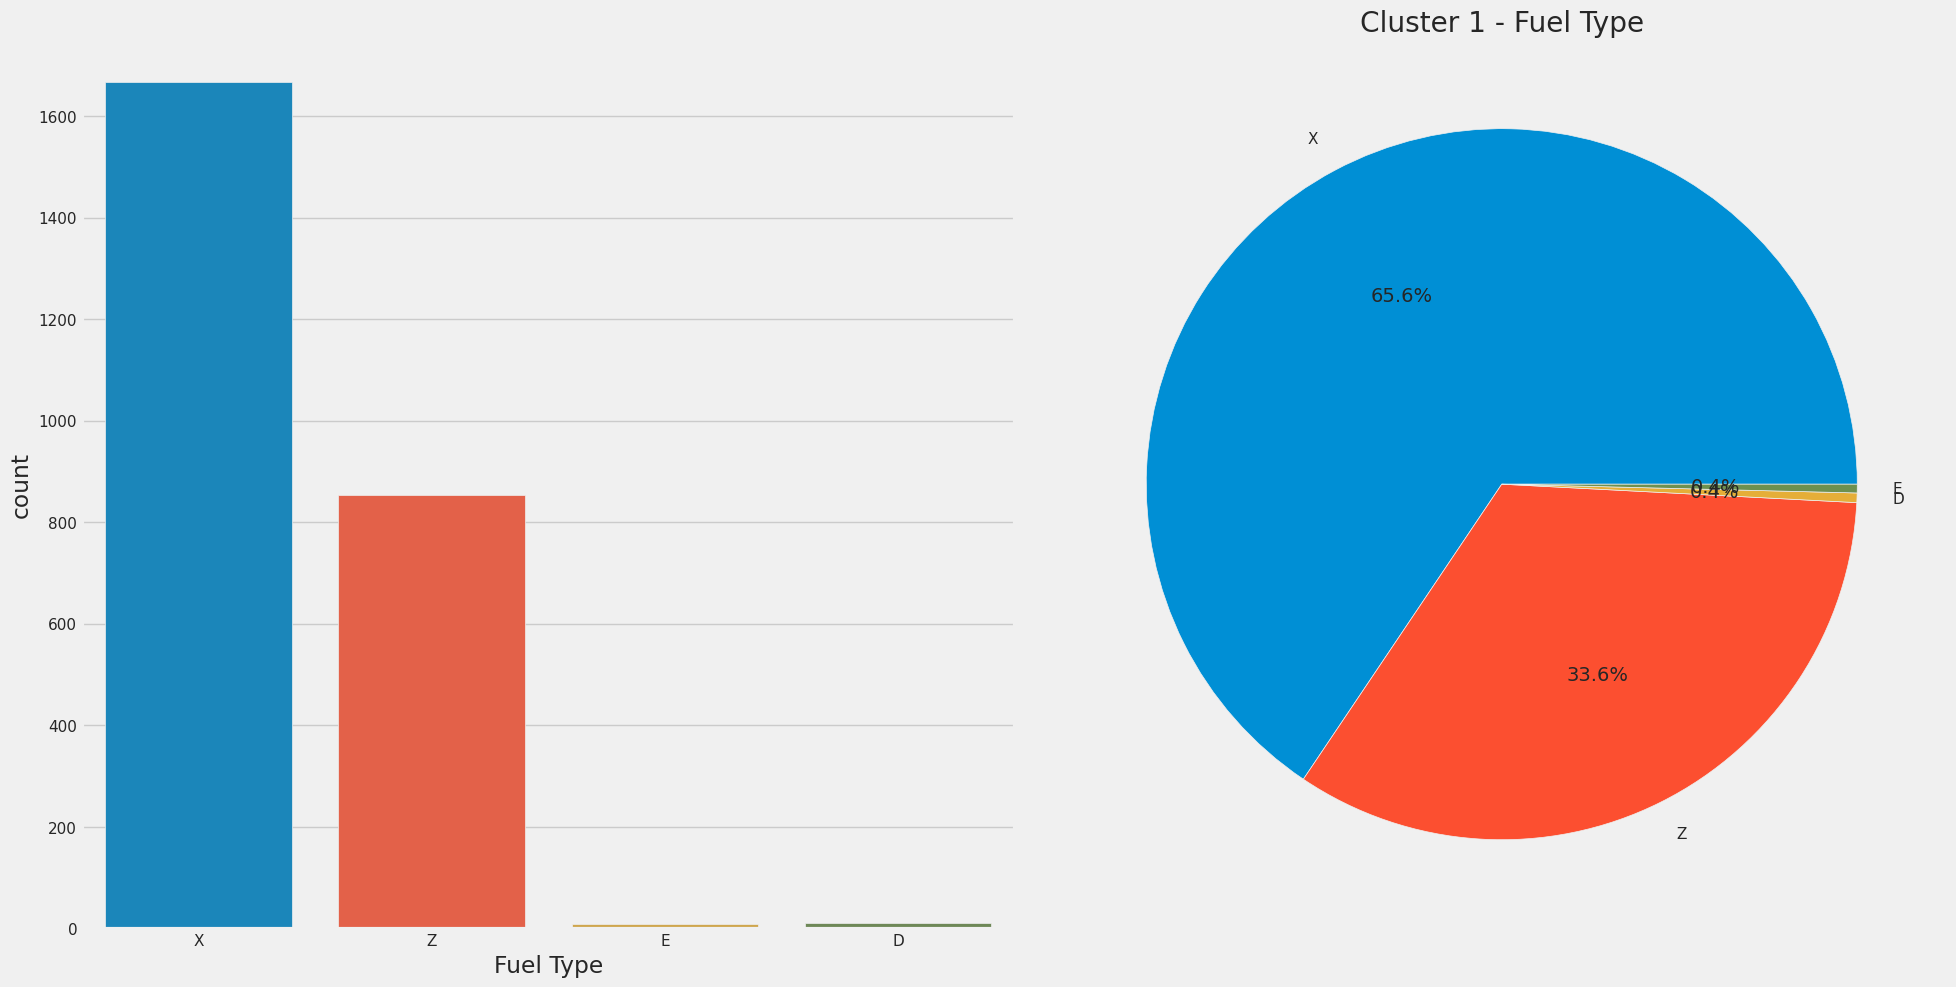

None

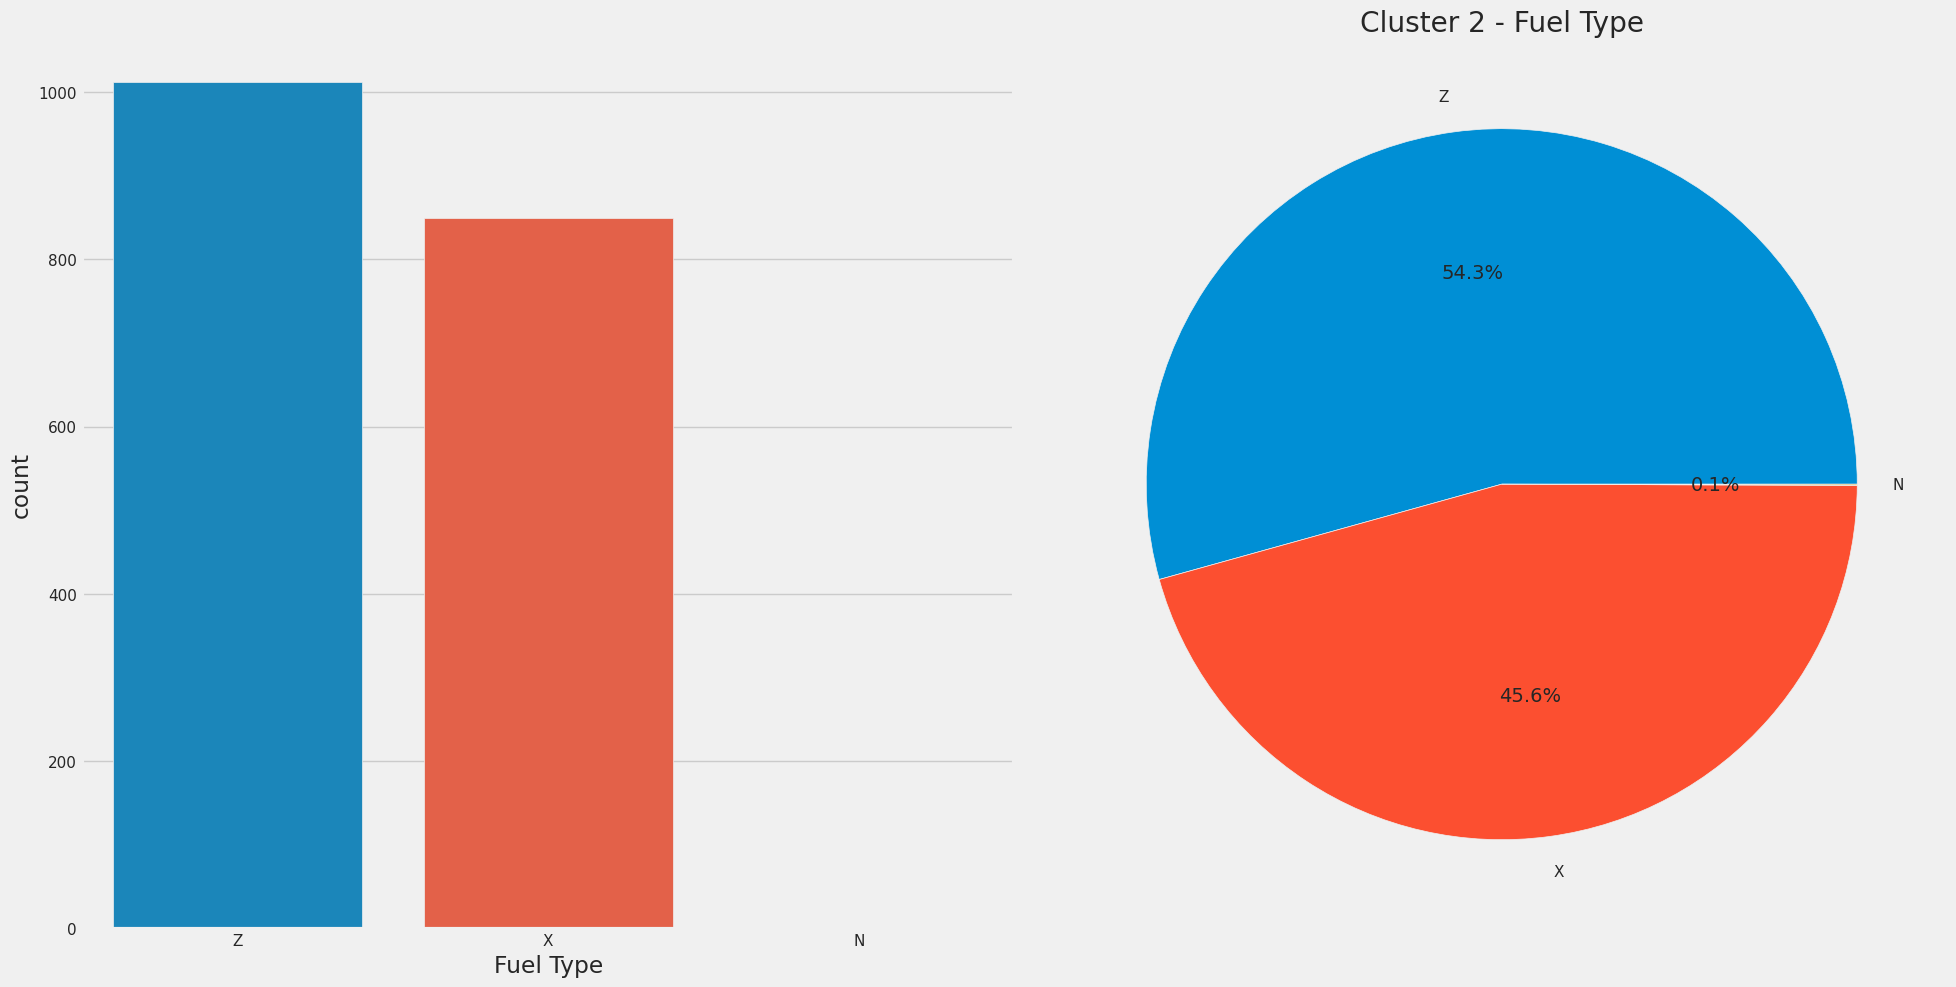

None

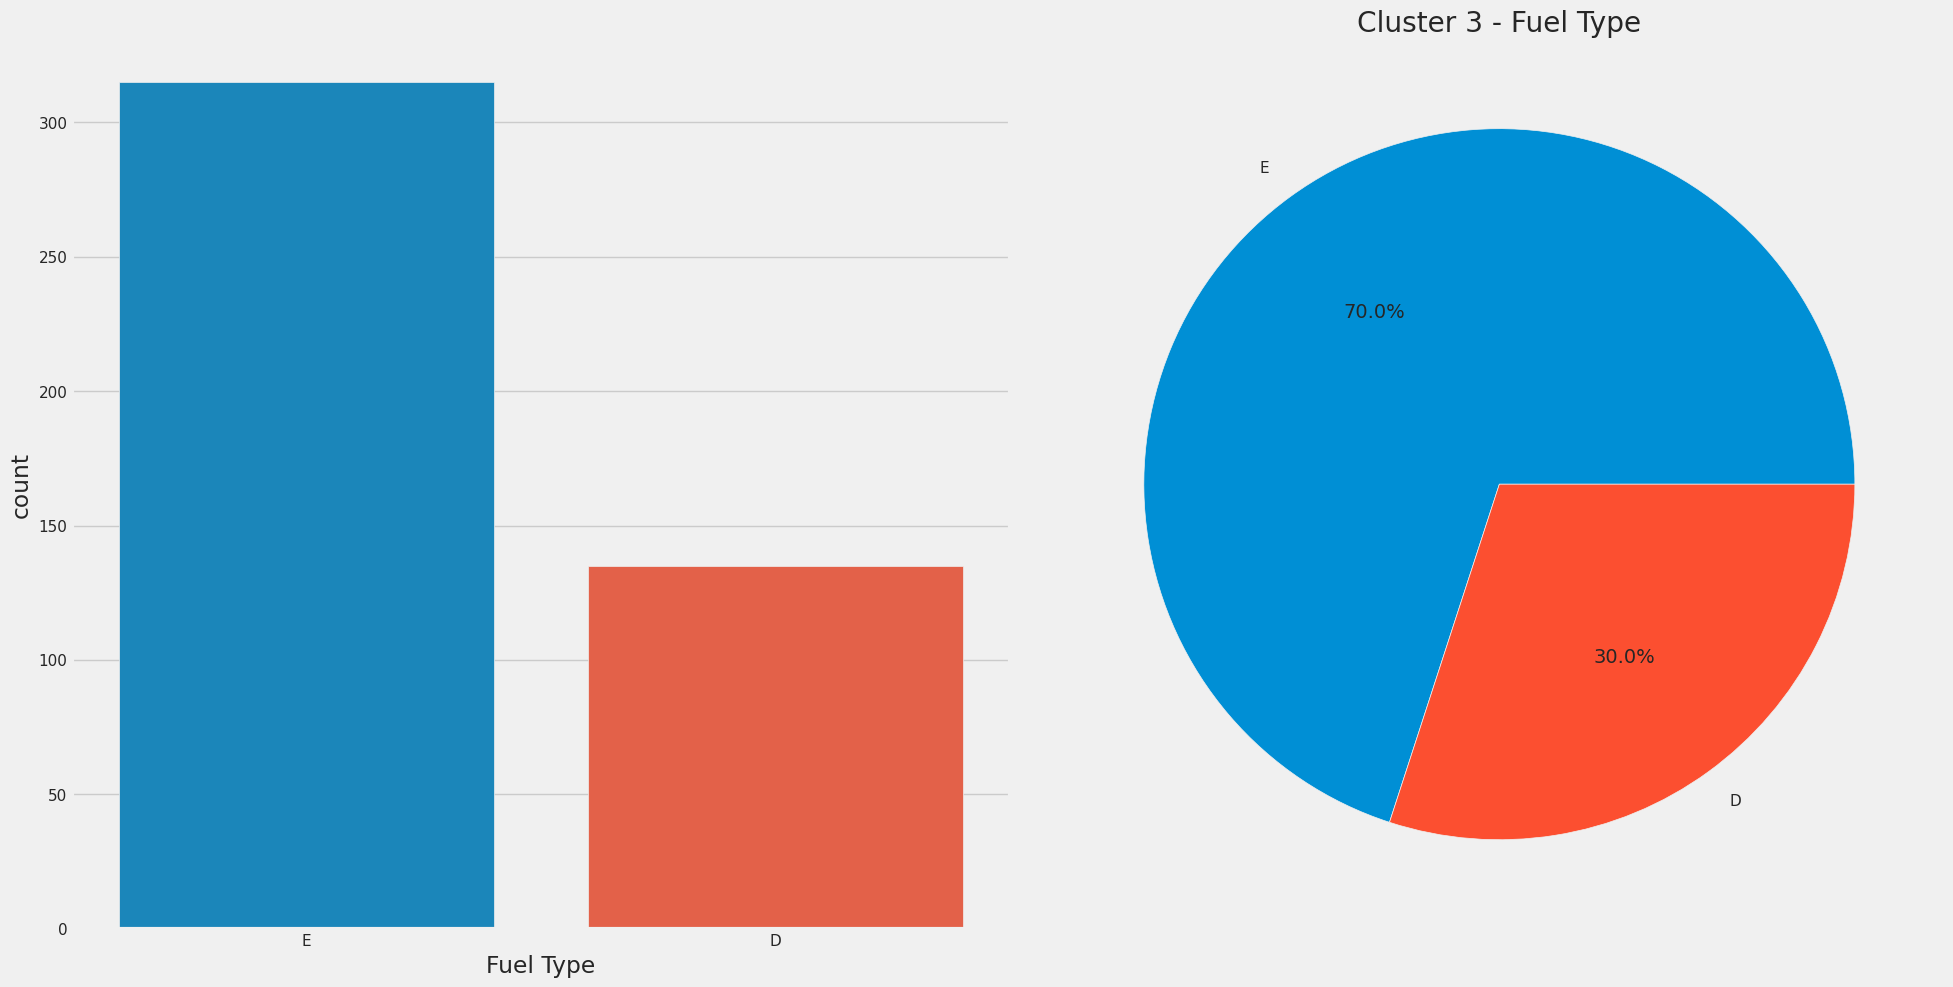

None

In [ ]:
  encode_cluster_0 = encode[encode['y_kmeans'] == 0]
encode_cluster_1 = encode[encode['y_kmeans'] == 1]
encode_cluster_2 = encode[encode['y_kmeans'] == 2]
encode_cluster_3 = encode[encode['y_kmeans'] == 3]

display(gerar_grafico_atributos_categoricos(encode_cluster_0, 'Fuel Type', "Cluster 0"))
display(gerar_grafico_atributos_categoricos(encode_cluster_1, 'Fuel Type', "Cluster 1"))
display(gerar_grafico_atributos_categoricos(encode_cluster_2, 'Fuel Type', "Cluster 2"))
display(gerar_grafico_atributos_categoricos(encode_cluster_3, 'Fuel Type', "Cluster 3"))

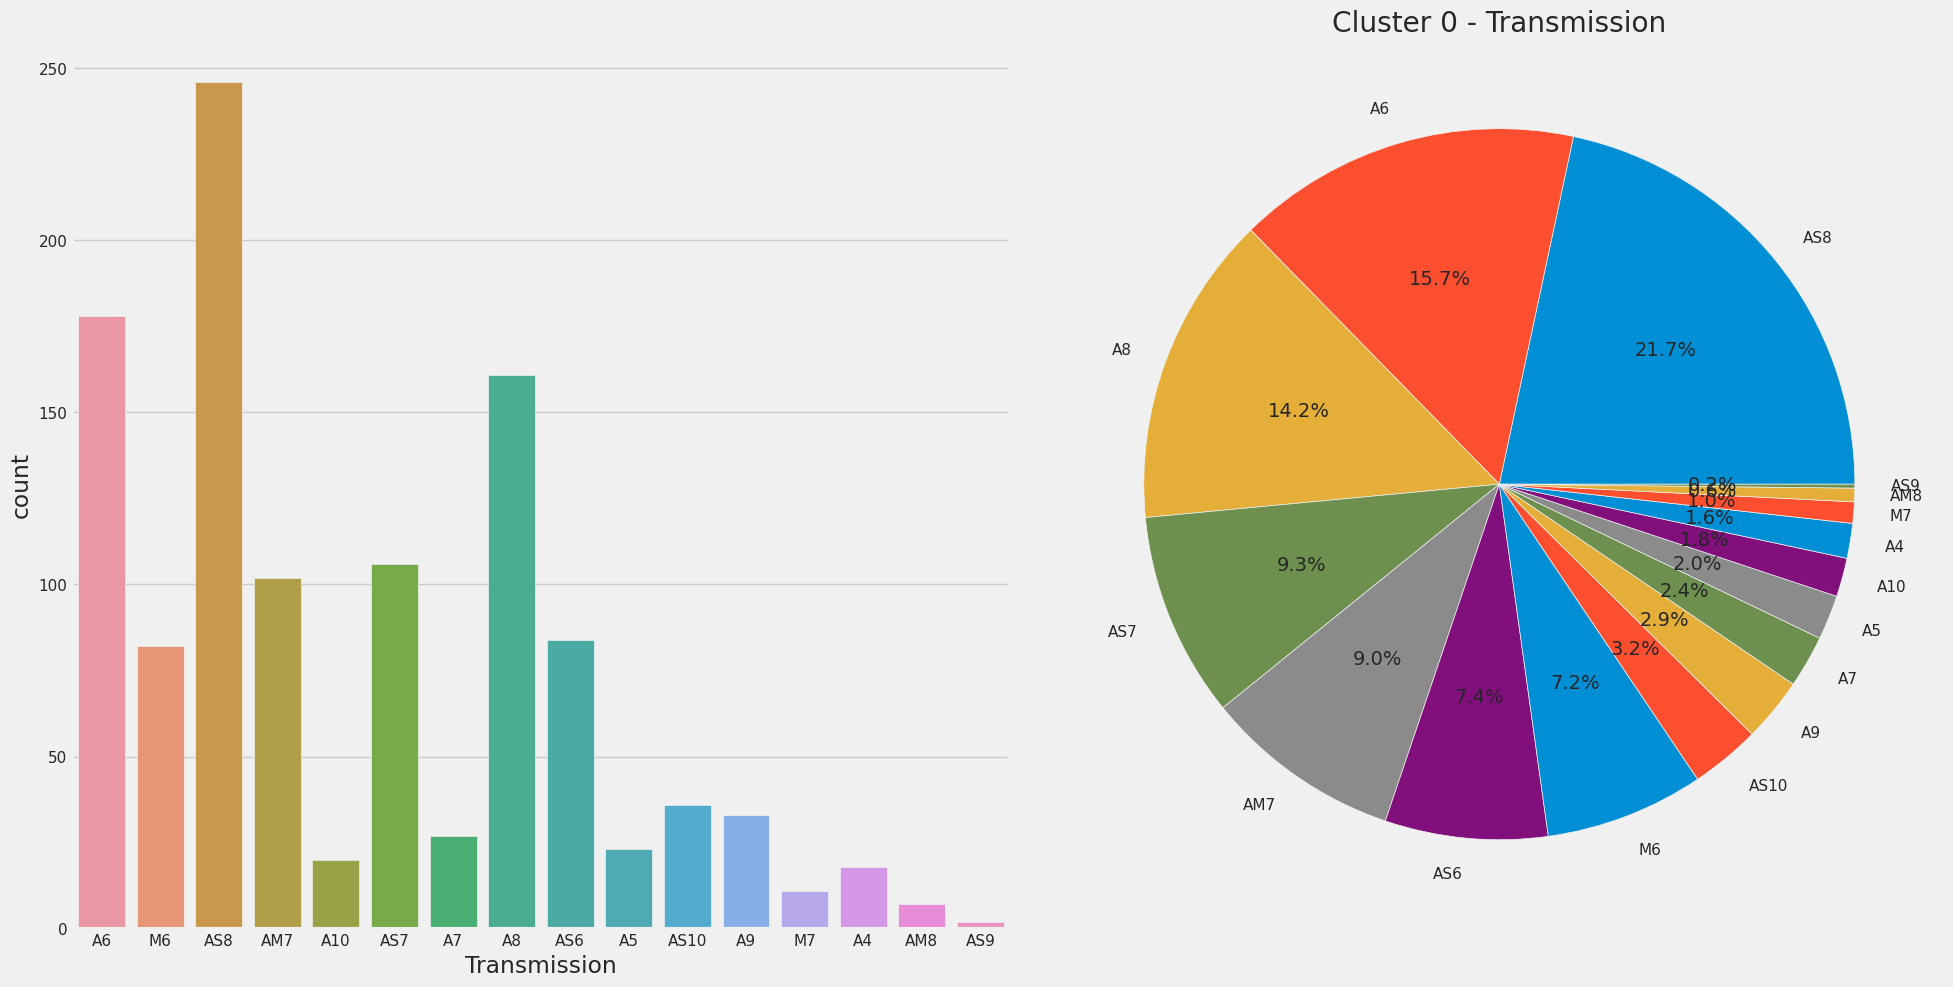

None

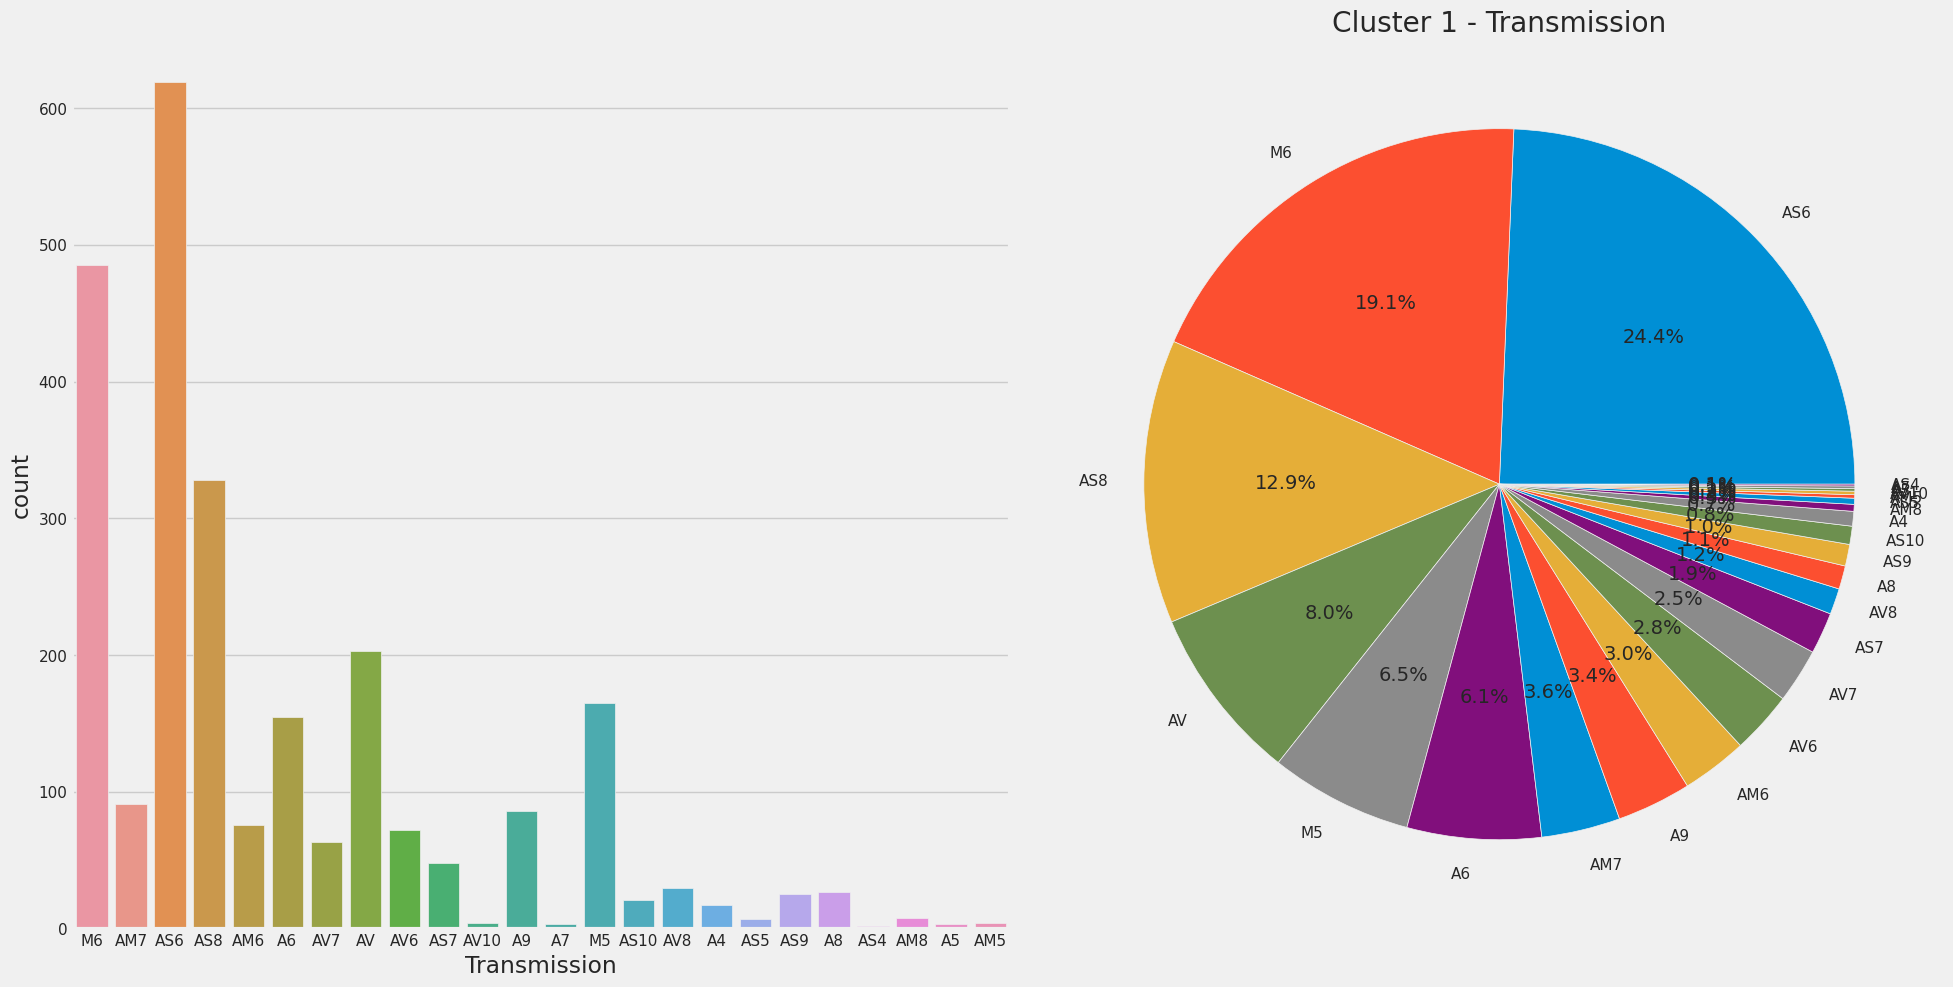

None

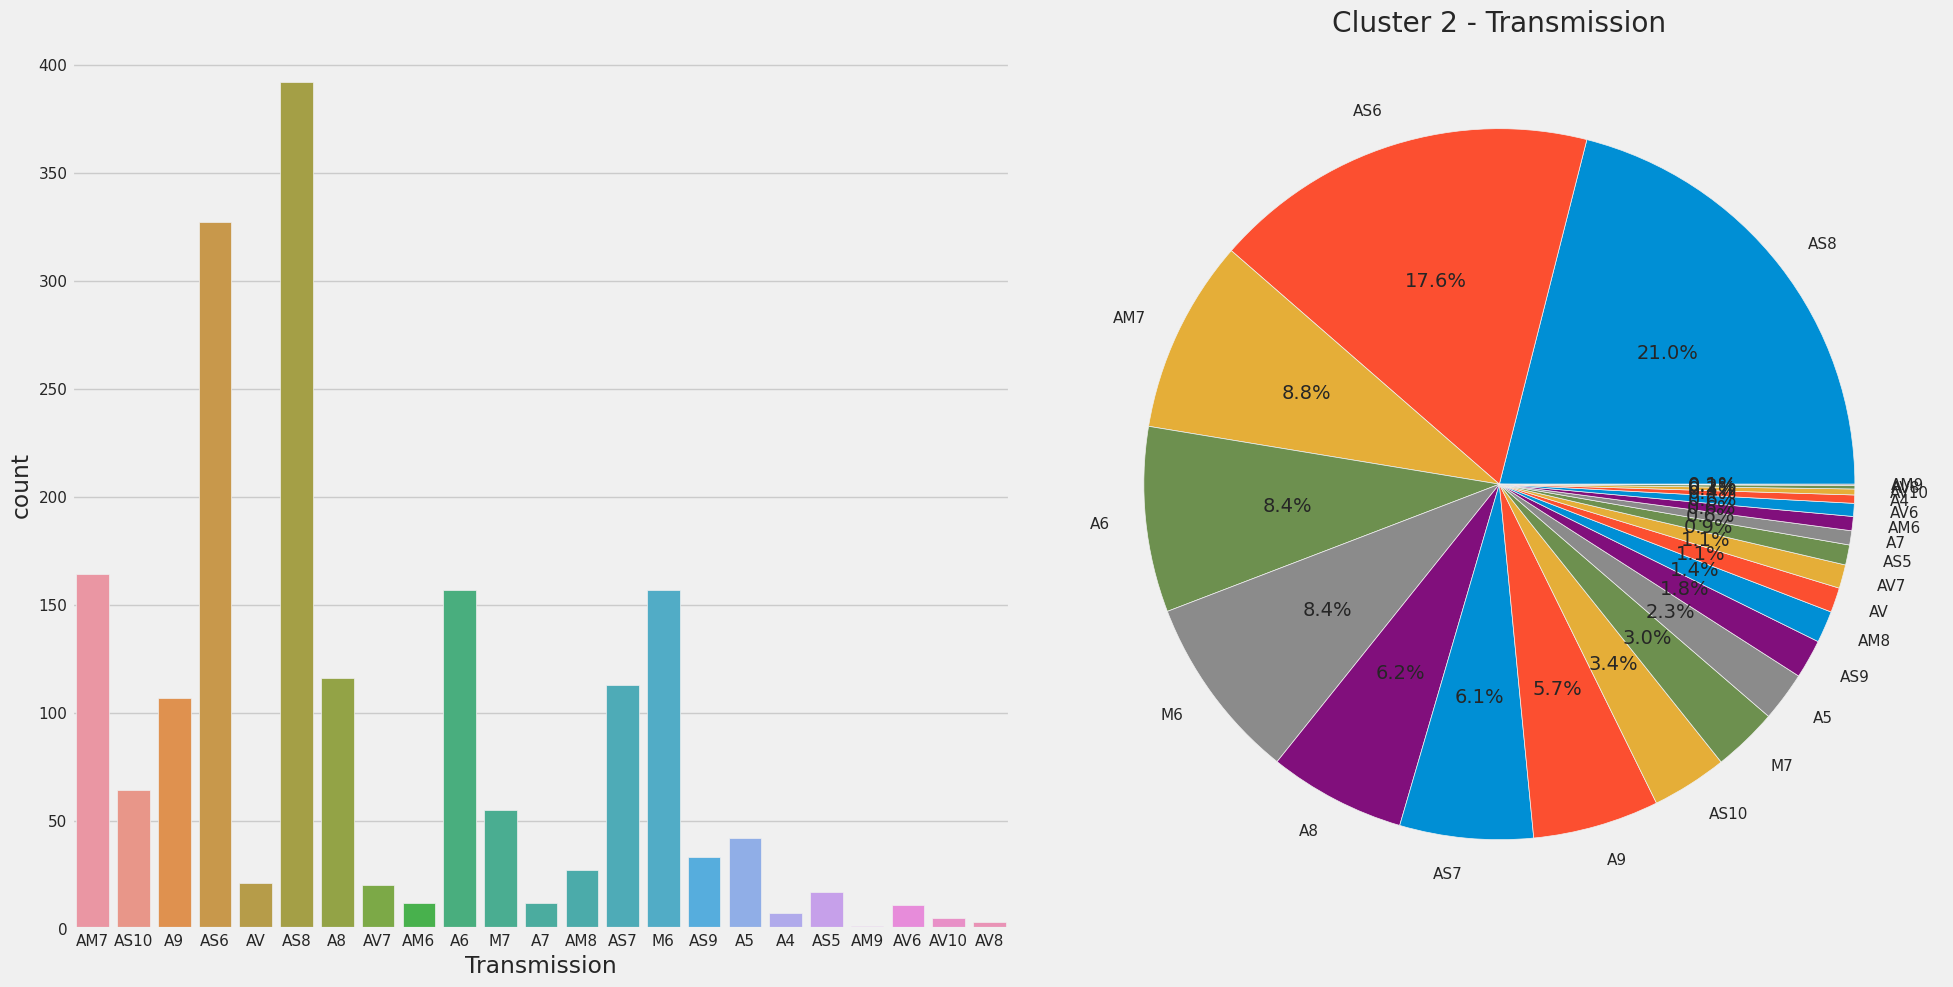

None

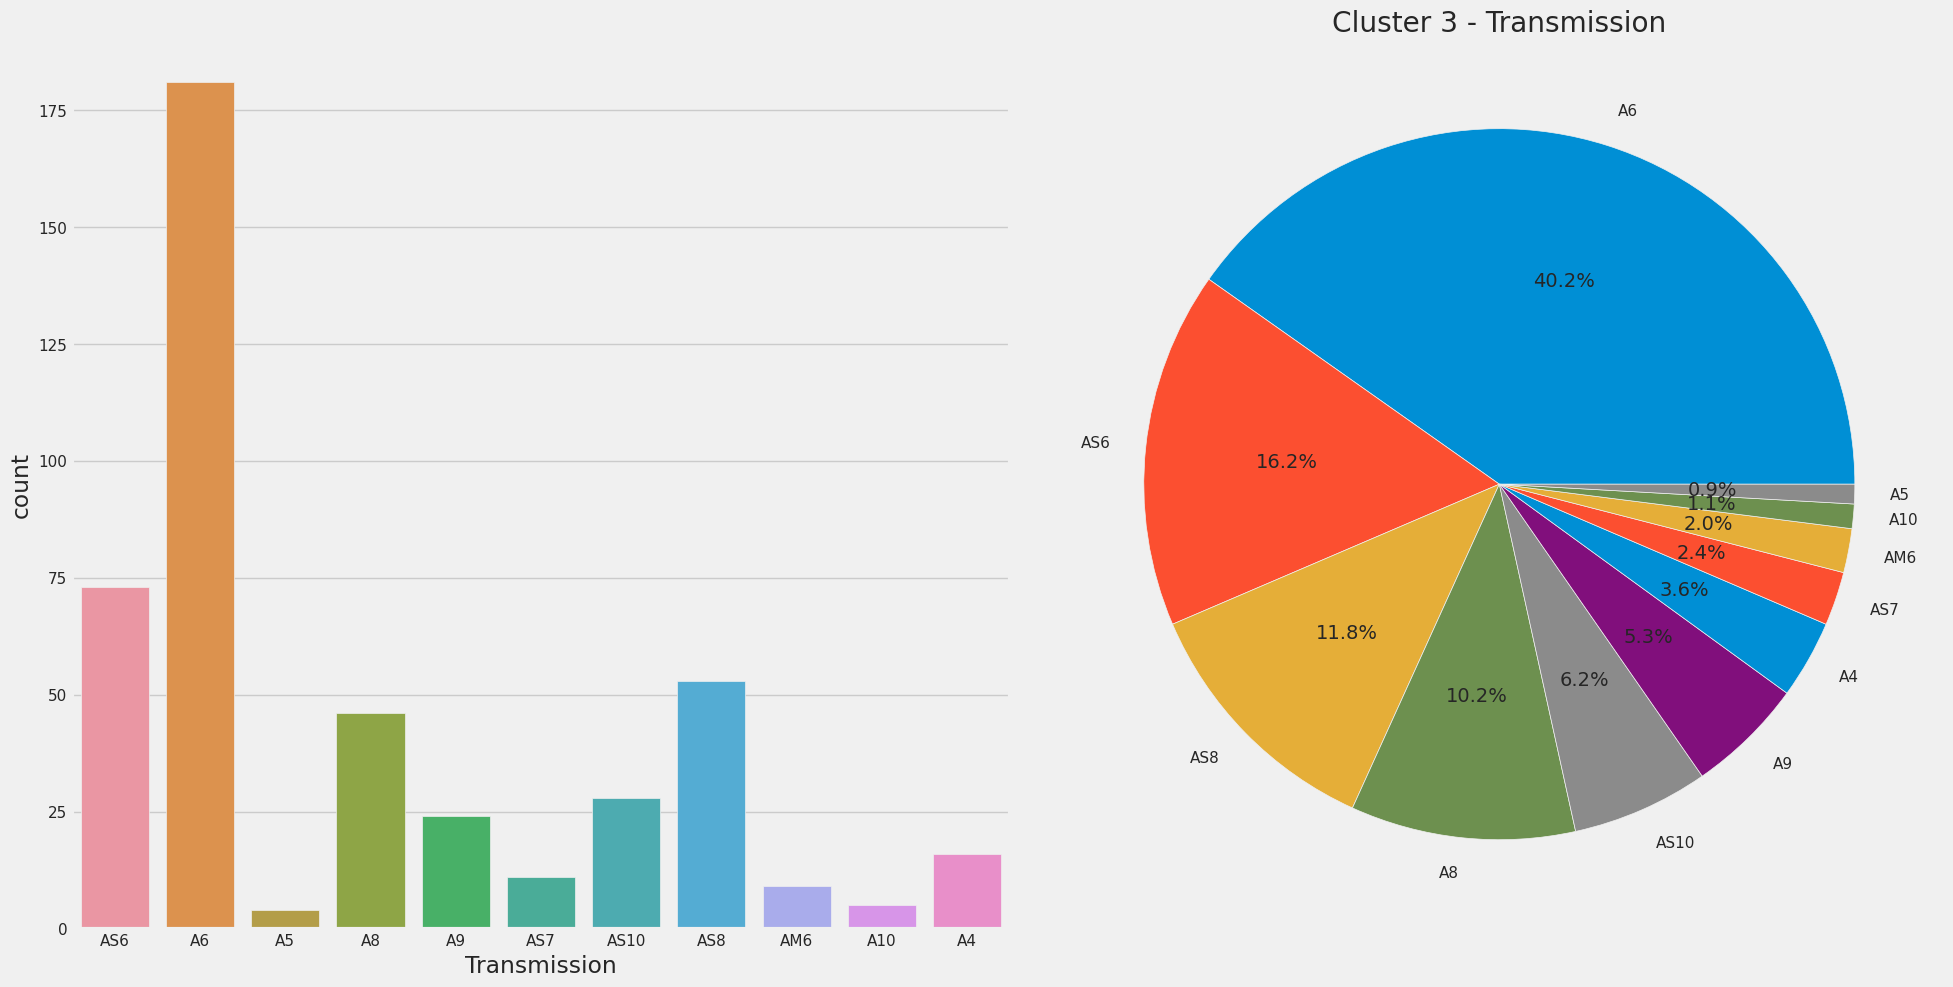

None

In [ ]:
display(gerar_grafico_atributos_categoricos(encode_cluster_0, 'Transmission', "Cluster 0"))
display(gerar_grafico_atributos_categoricos(encode_cluster_1, 'Transmission', "Cluster 1"))
display(gerar_grafico_atributos_categoricos(encode_cluster_2, 'Transmission', "Cluster 2"))
display(gerar_grafico_atributos_categoricos(encode_cluster_3, 'Transmission', "Cluster 3"))

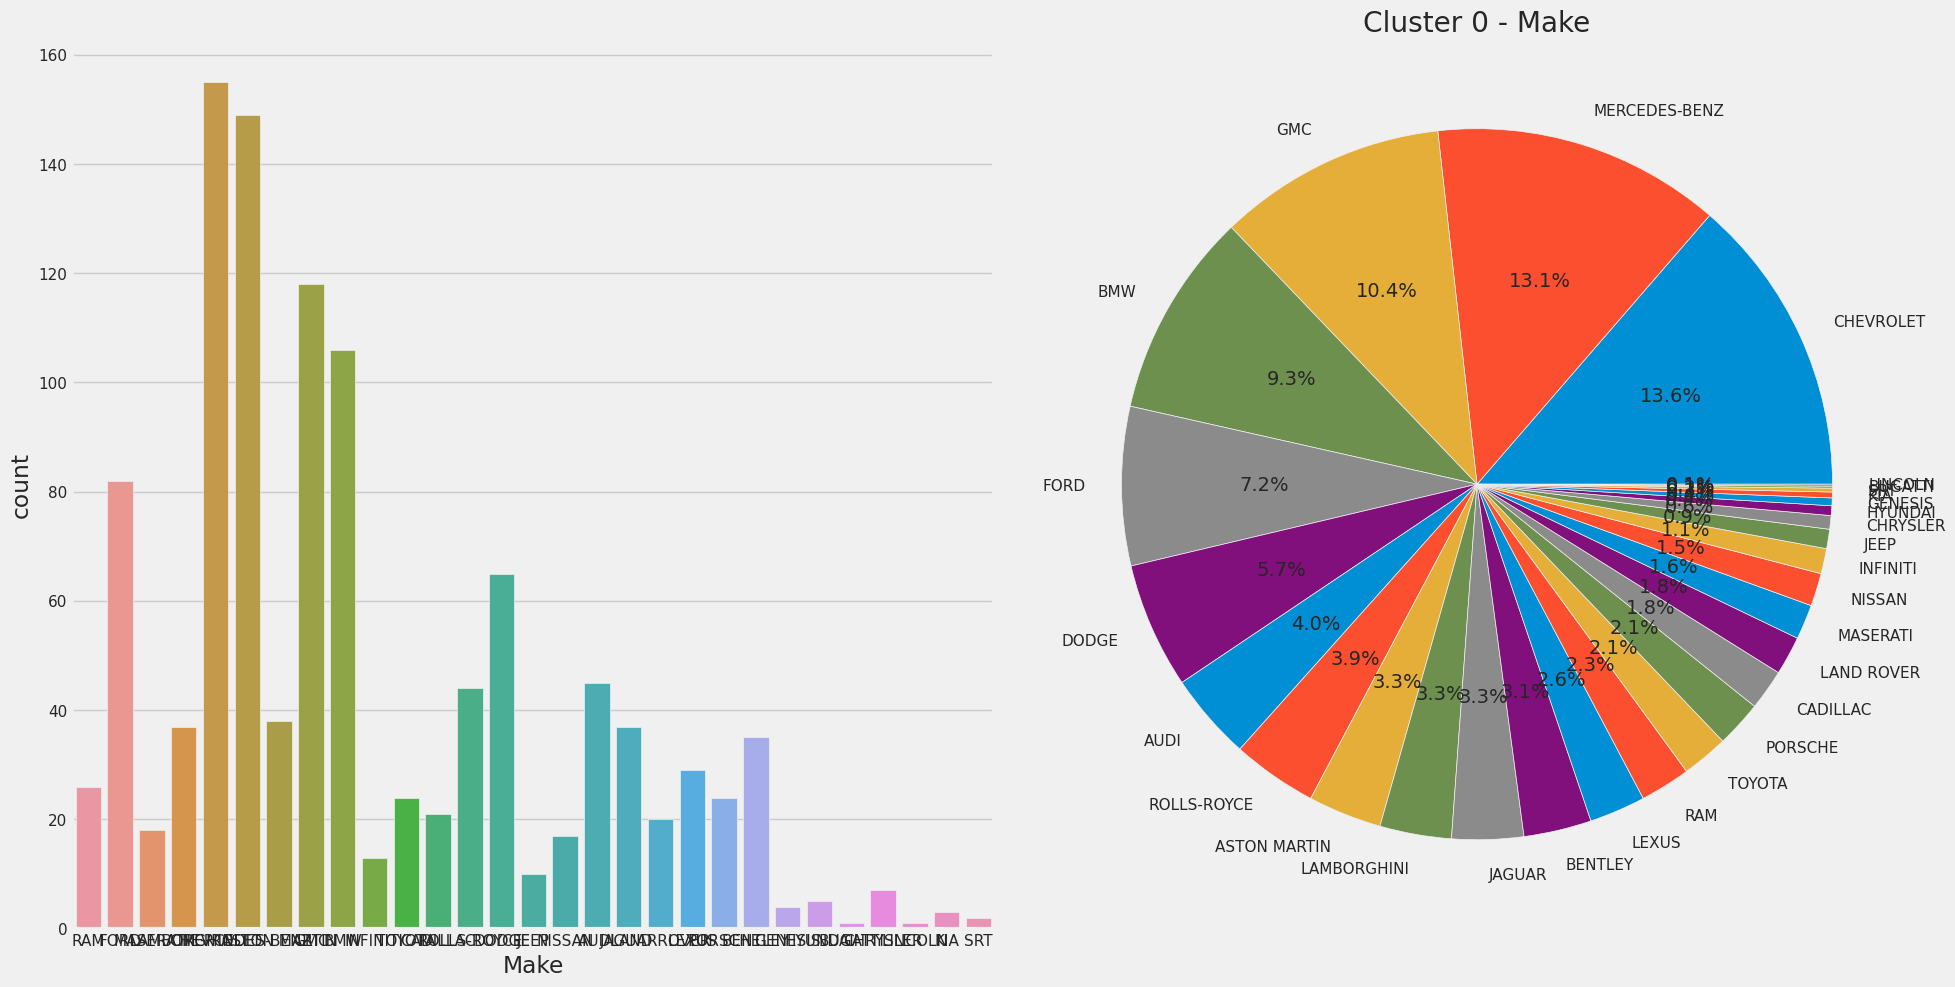

None

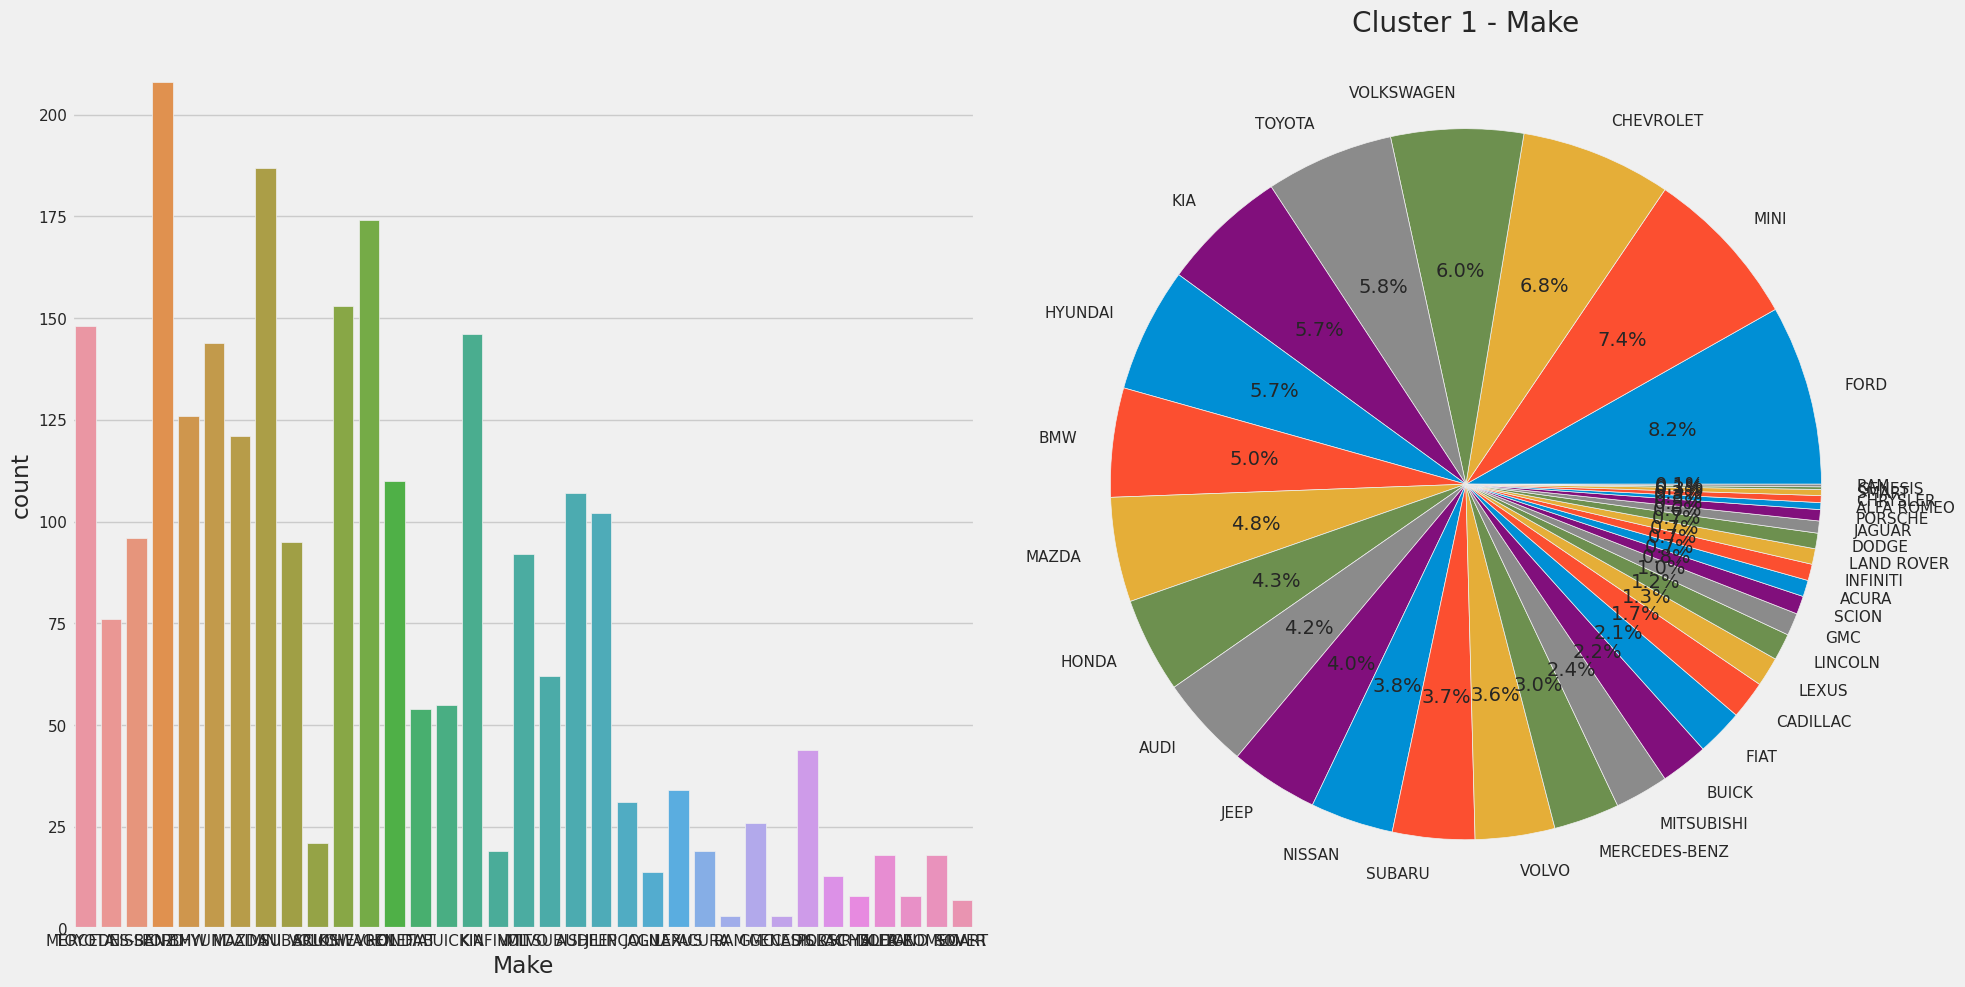

None

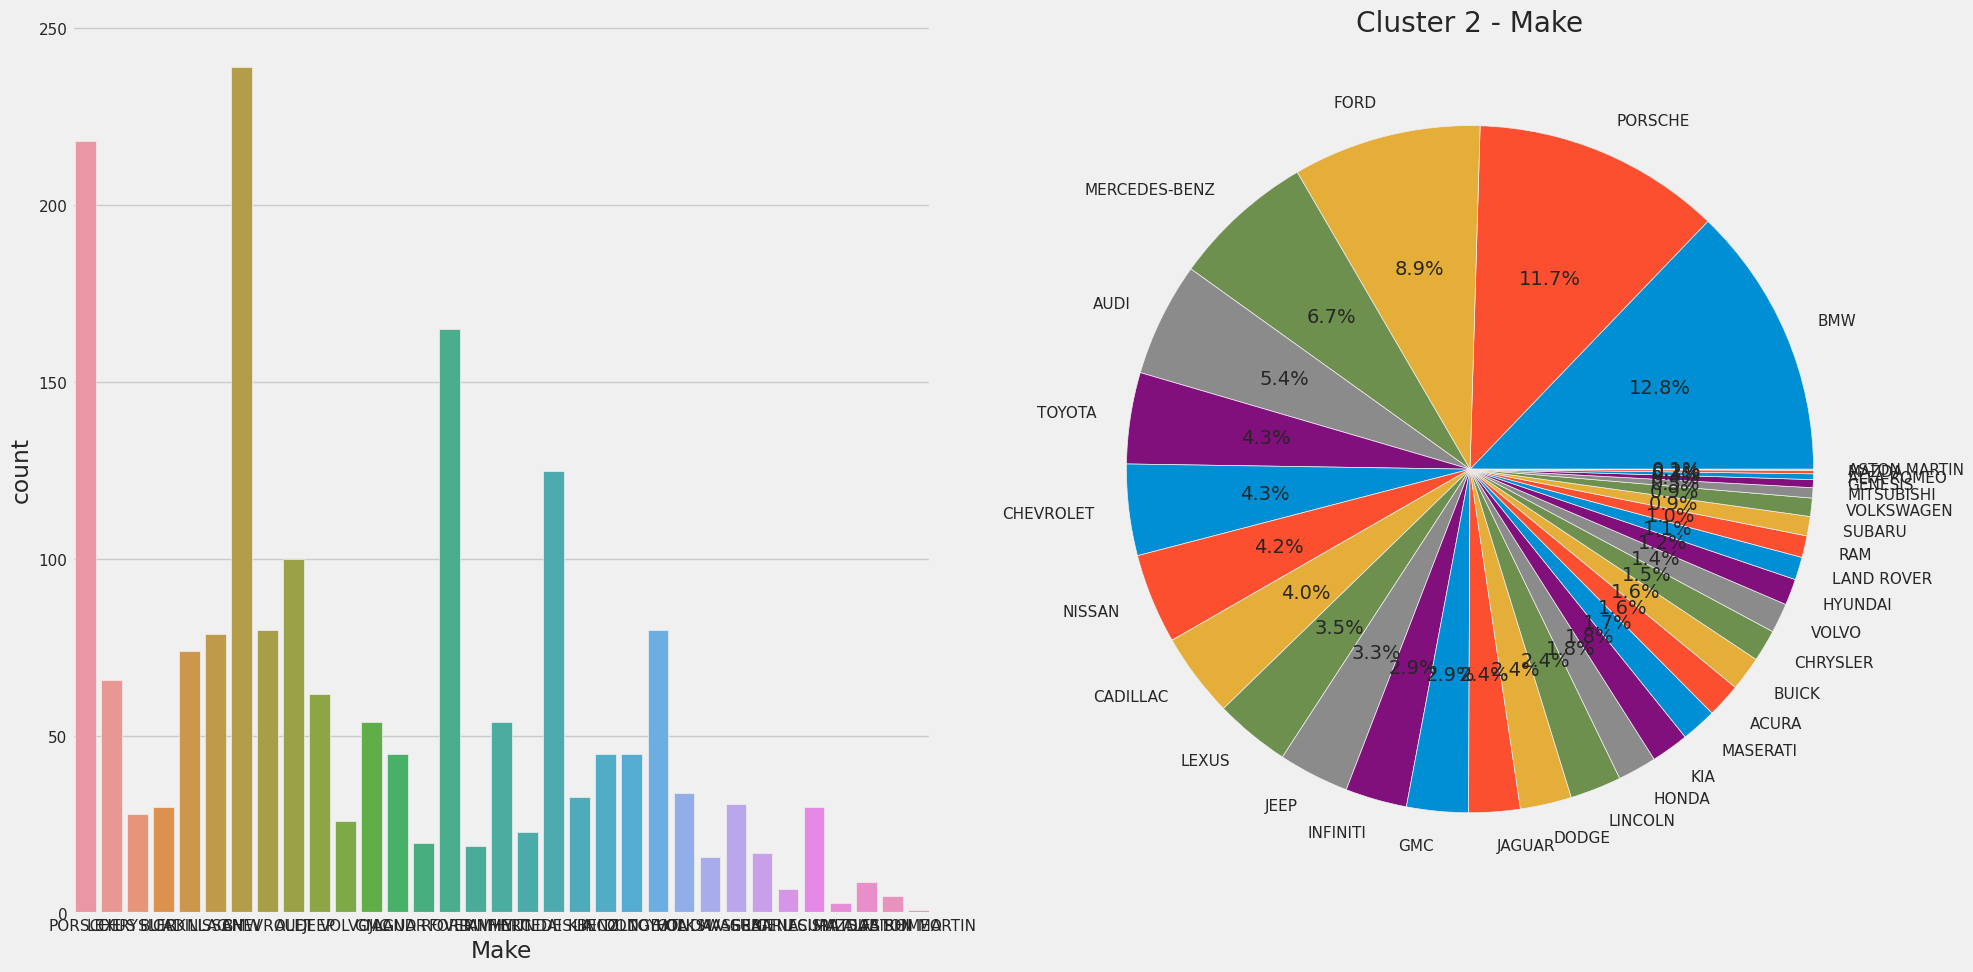

None

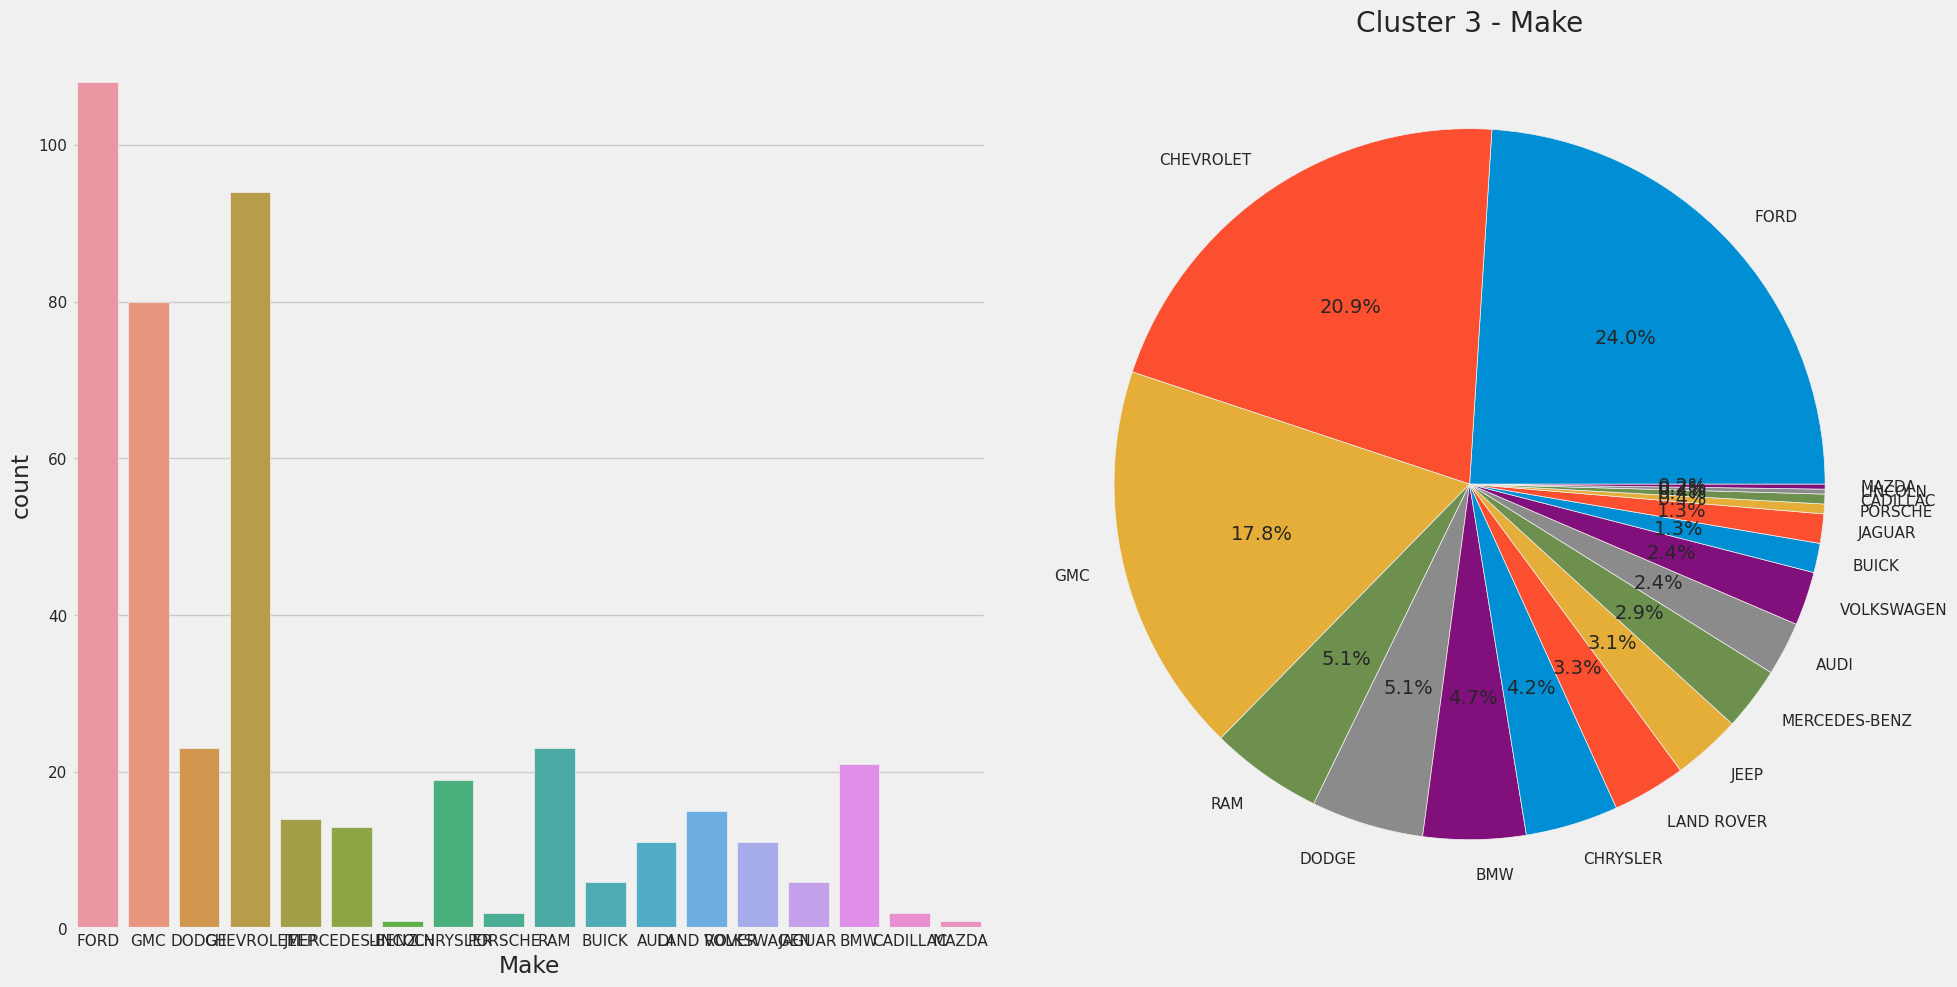

None

In [ ]:
display(gerar_grafico_atributos_categoricos(encode_cluster_0, 'Make', "Cluster 0" ))
display(gerar_grafico_atributos_categoricos(encode_cluster_1, 'Make', "Cluster 1"))
display(gerar_grafico_atributos_categoricos(encode_cluster_2, 'Make', "Cluster 2"))
display(gerar_grafico_atributos_categoricos(encode_cluster_3, 'Make', "Cluster 3"))

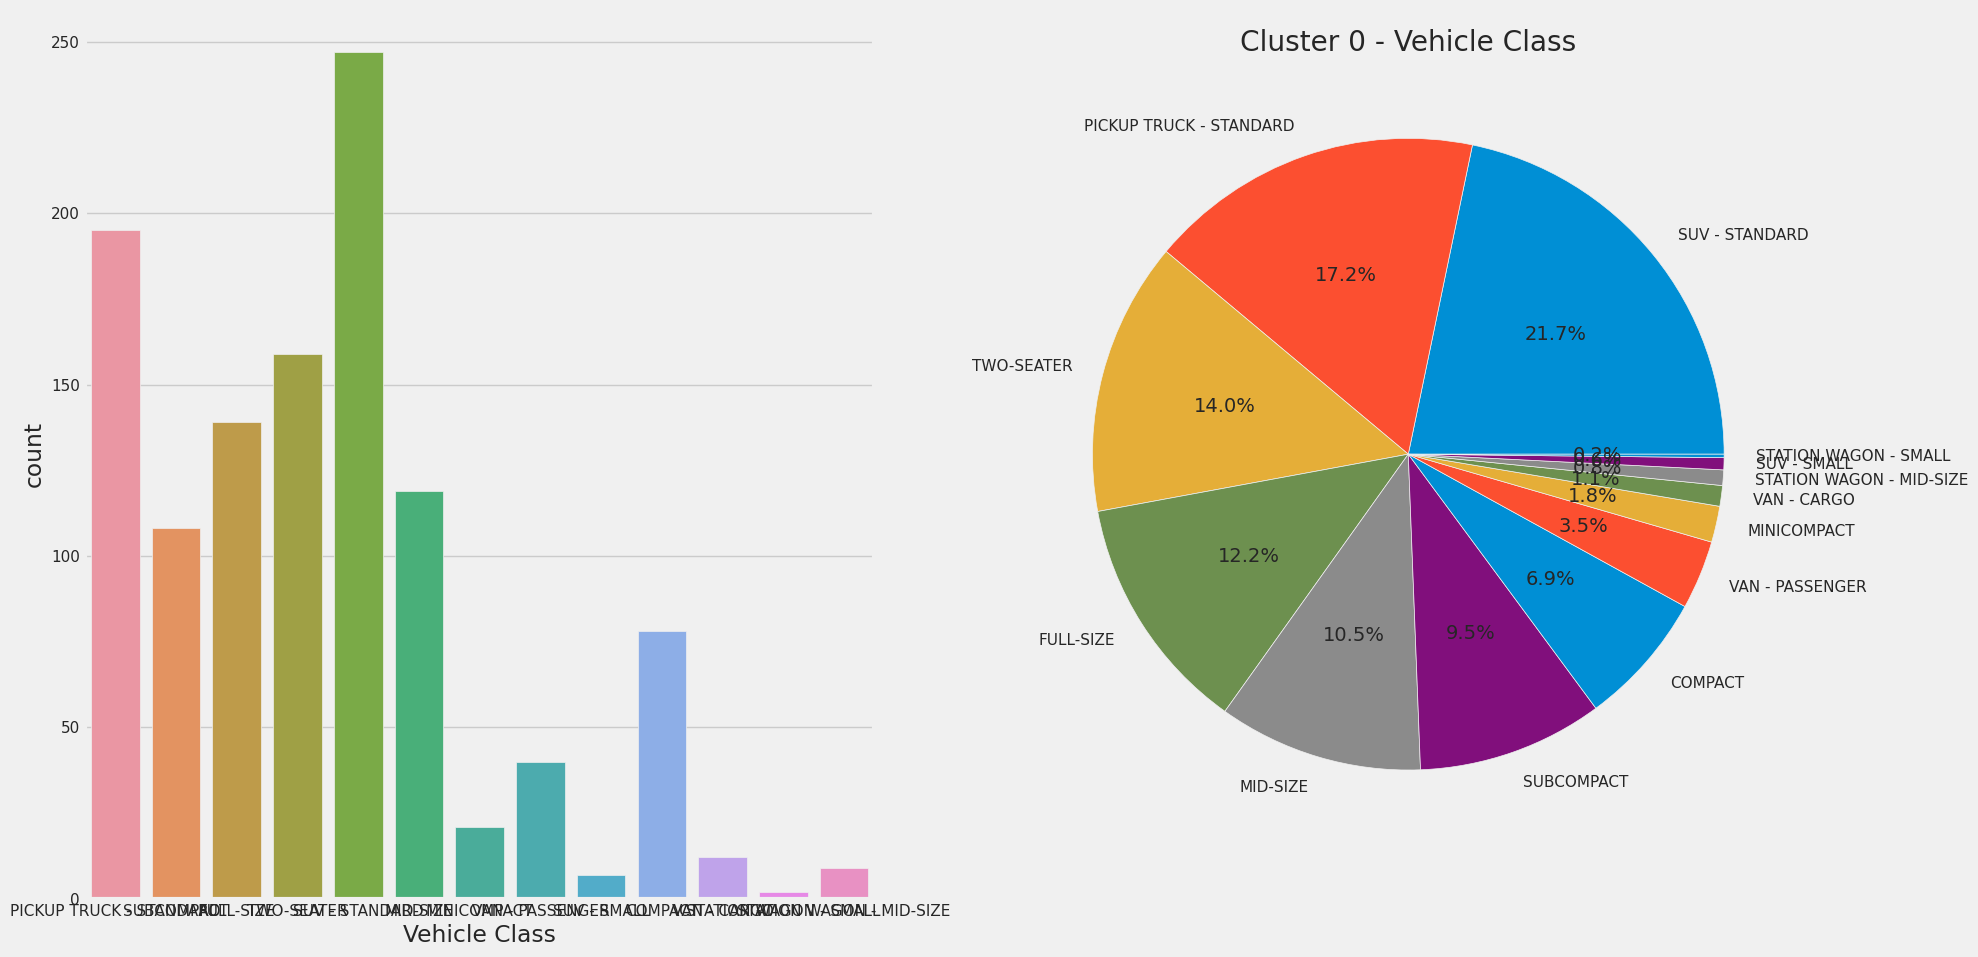

None

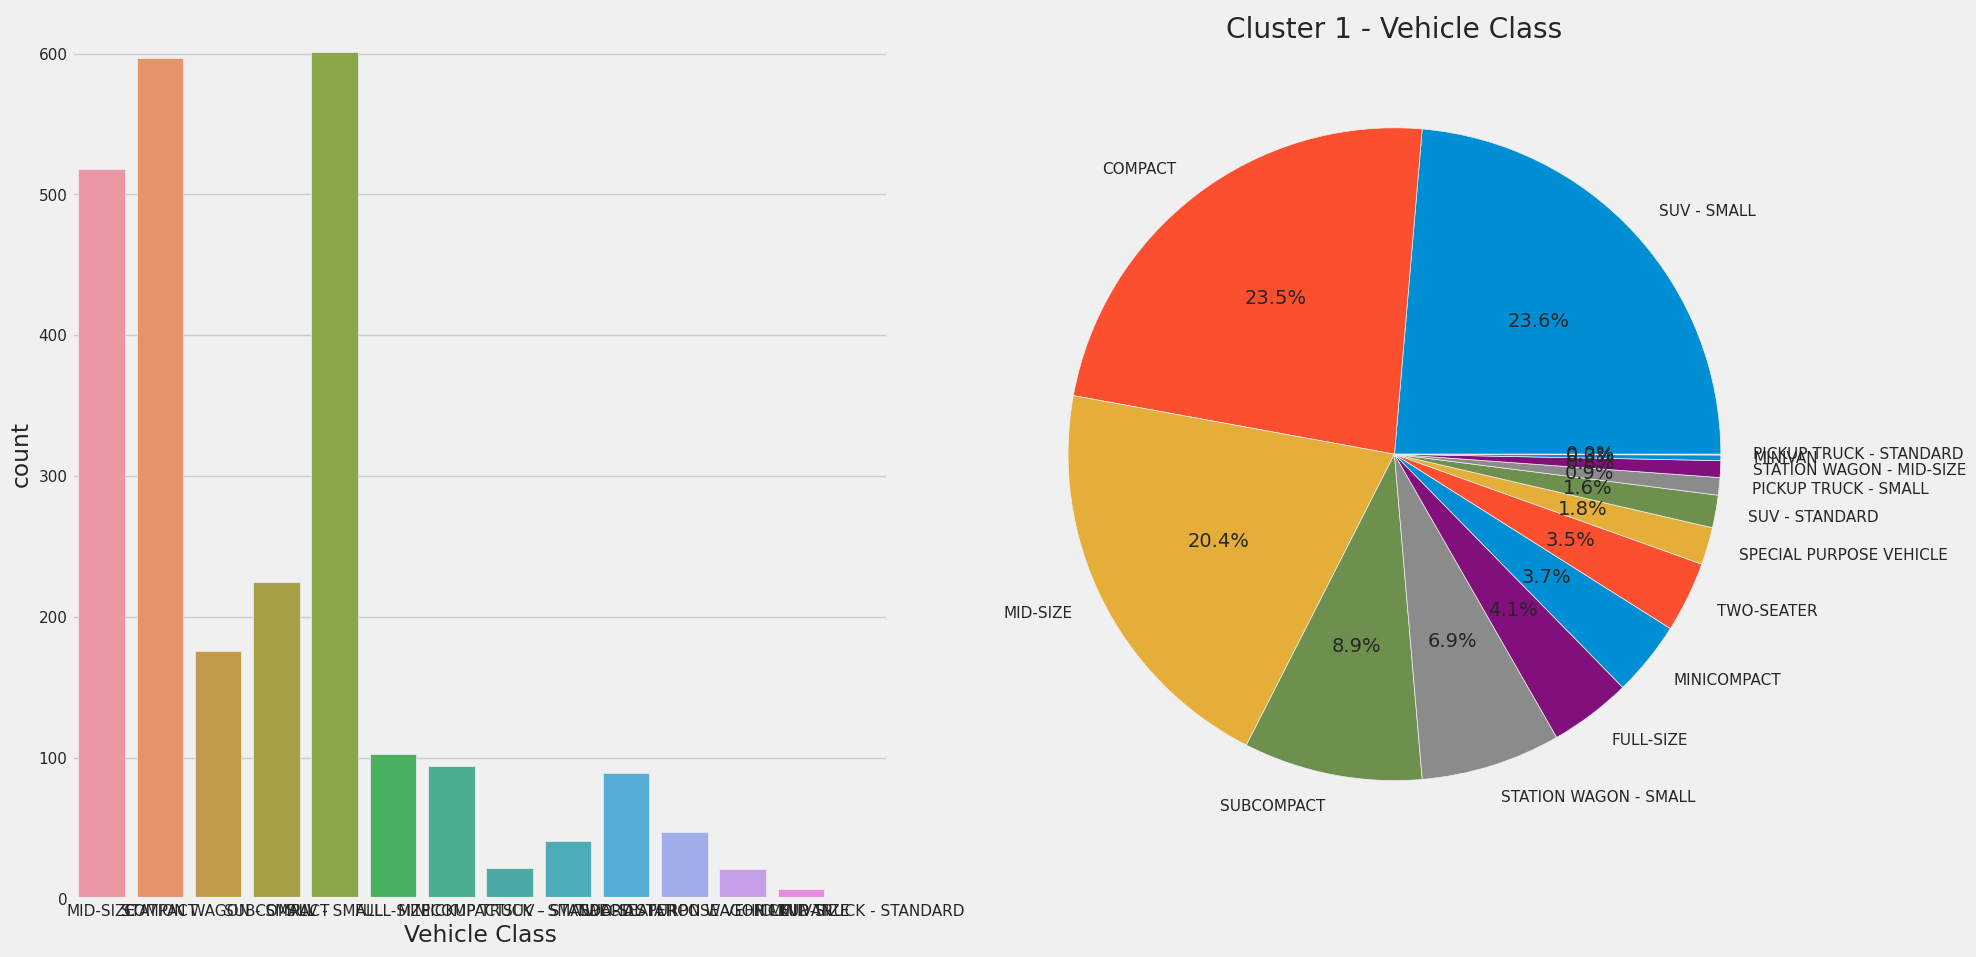

None

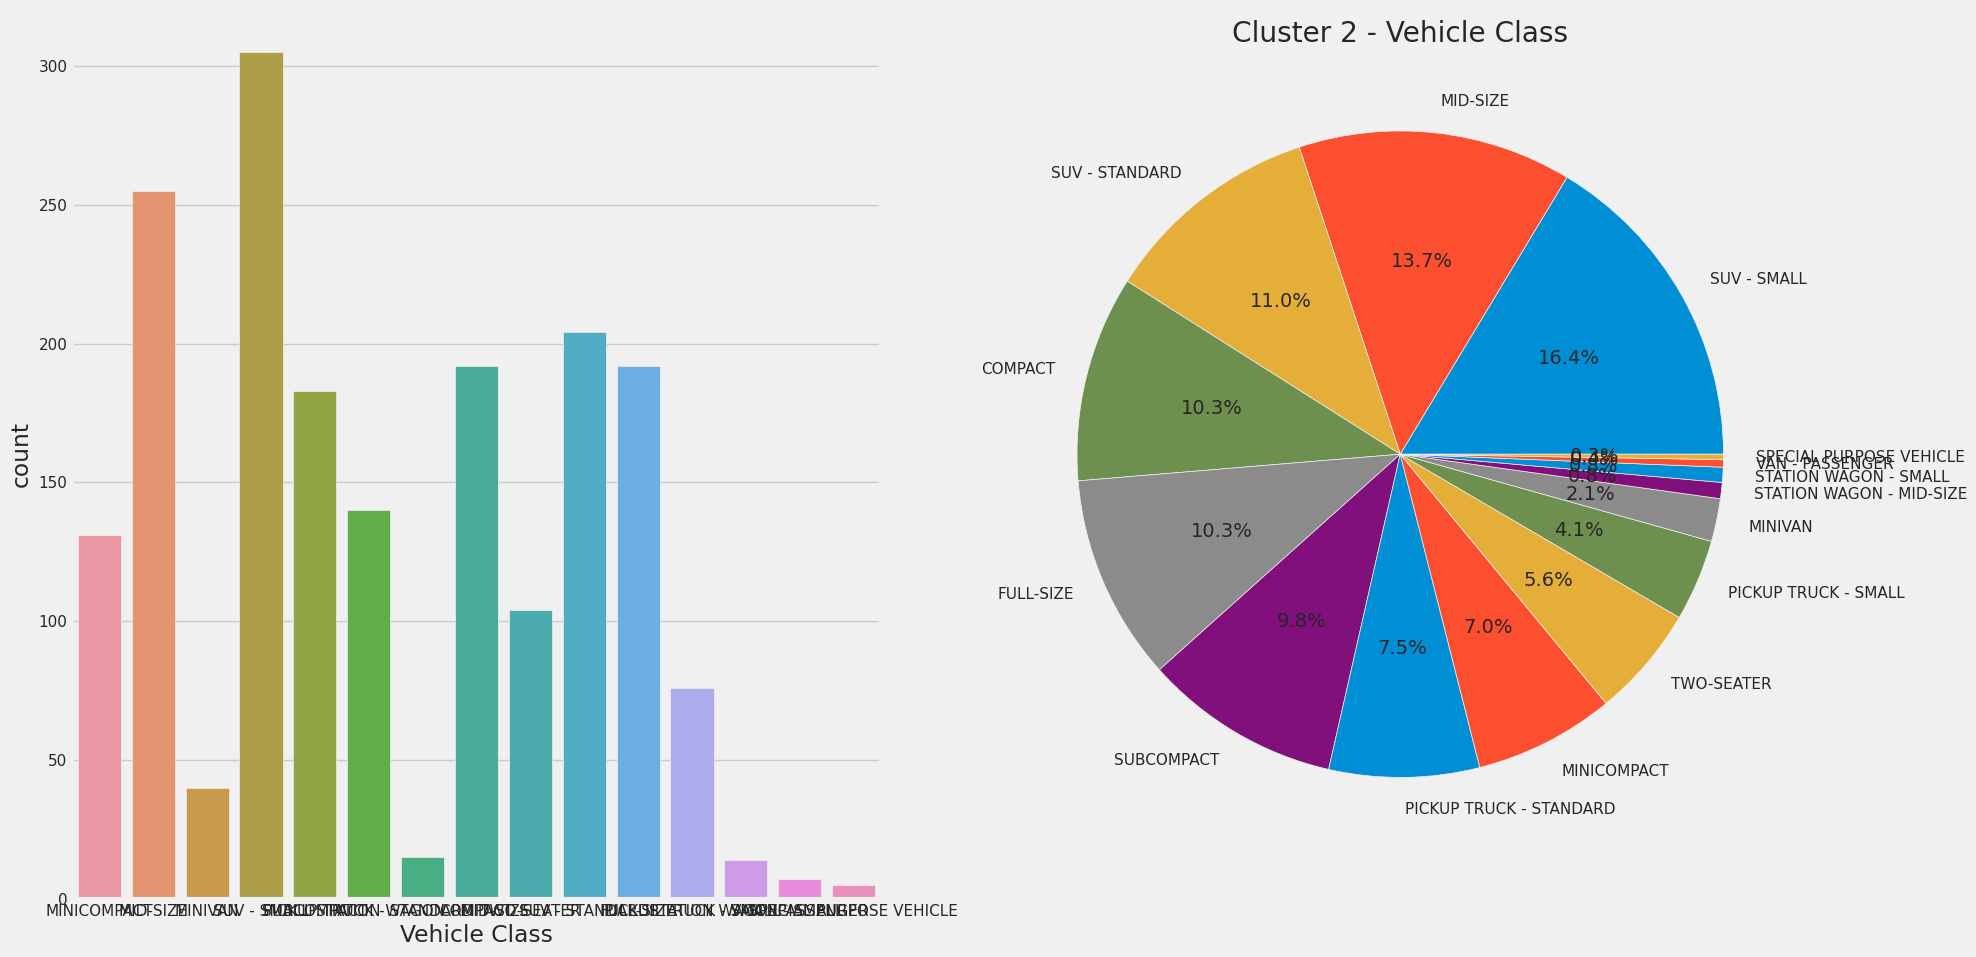

None

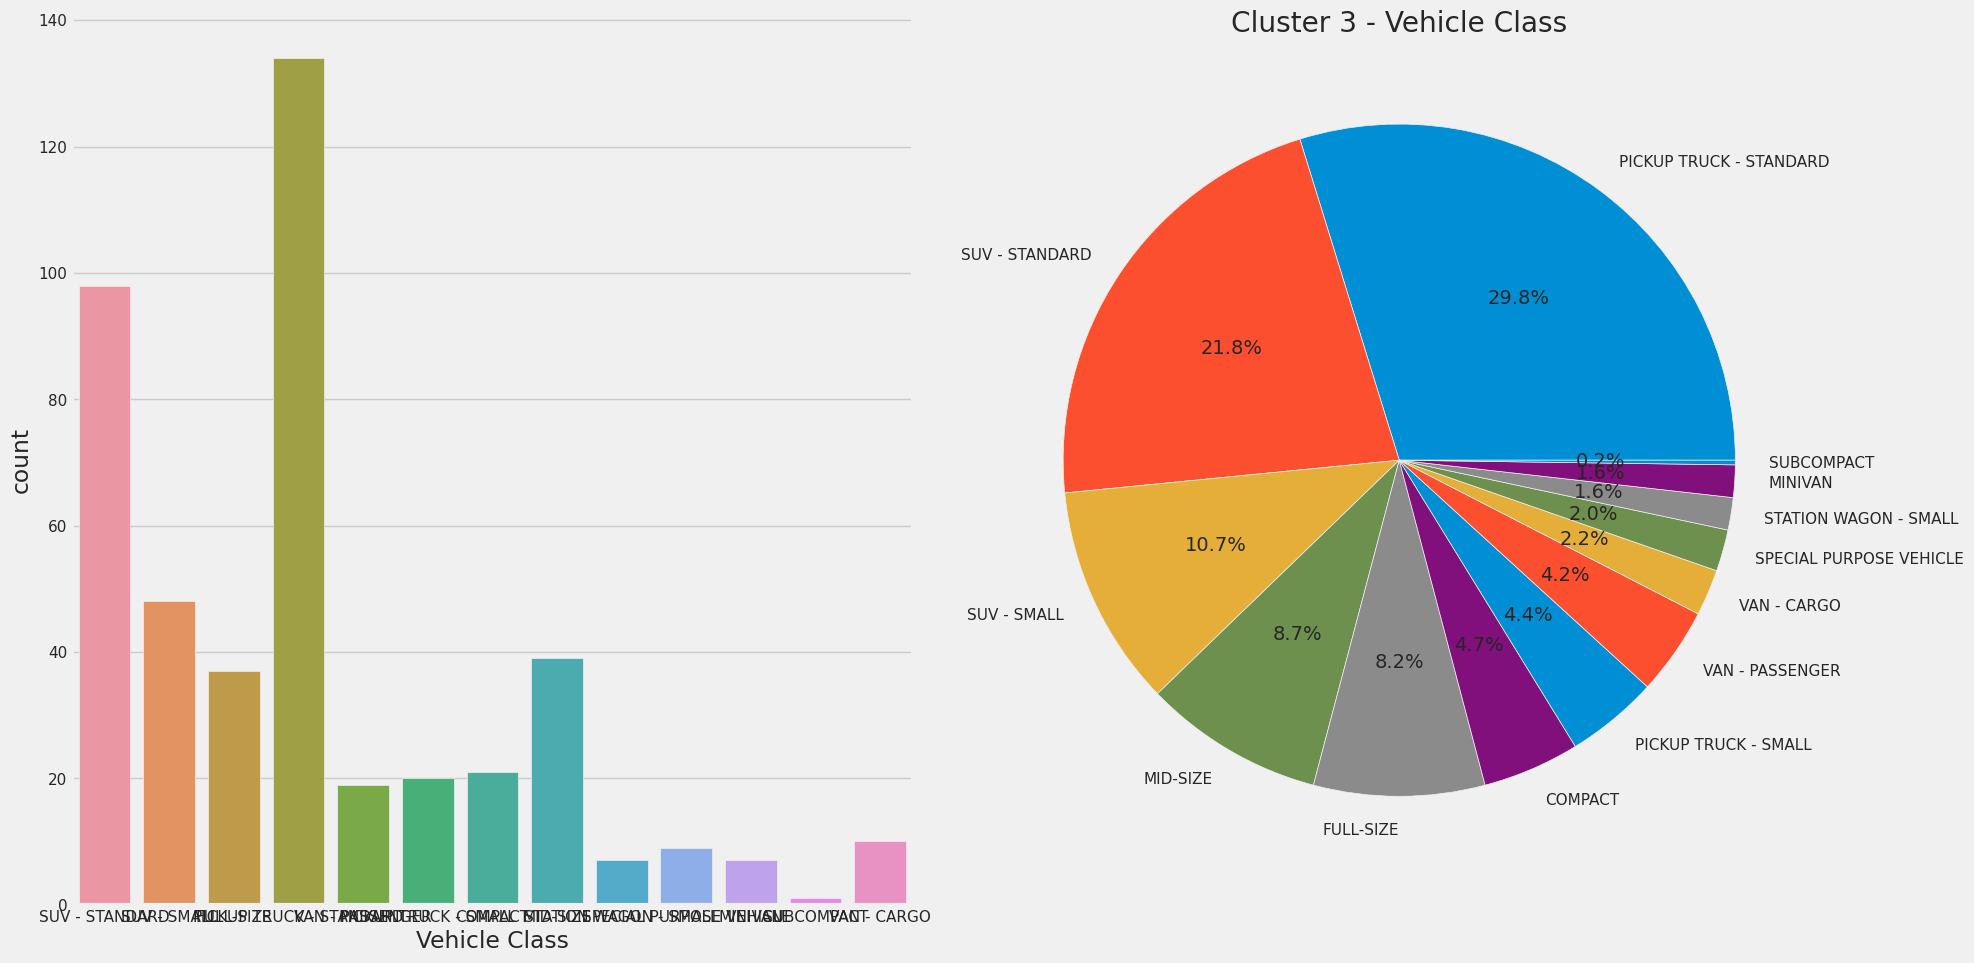

None

In [ ]:
display(gerar_grafico_atributos_categoricos(encode_cluster_0, 'Vehicle Class', "Cluster 0" ))
display(gerar_grafico_atributos_categoricos(encode_cluster_1, 'Vehicle Class', "Cluster 1"))
display(gerar_grafico_atributos_categoricos(encode_cluster_2, 'Vehicle Class', "Cluster 2"))
display(gerar_grafico_atributos_categoricos(encode_cluster_3, 'Vehicle Class', "Cluster 3"))

In [ ]:
data_cluster_1

Make  Model  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
4       39    463              2             1.8          4            25   
6       28    235              0             2.0          4             9   
9       31   1101              9             2.0          4            25   
12      13    704              0             2.0          4            15   
14       5     78             10             2.0          4            17   
...    ...    ...            ...             ...        ...           ...   
5986    13    707              2             2.0          4            25   
5987    16    408              0             1.8          4            24   
5988    29    846             10             2.0          4            17   
5989    29    849              3             1.6          4            25   
5990     0   1410              0             2.4          4            25   

      Fuel Type  Fuel Consumption Comb (L/100 km)  CO2 Emissions(g/km)  \
4             3                               7.5                  176   
6             4                               9.2                  217   
9             3                               9.2                  216   
12            1                              10.3                  165   
14            4                               9.6                  221   
...         ...                               ...                  ...   
5986          3                               9.2                  217   
5987          3                               7.7                  177   
5988          4                               8.1                  190   
5989          4                               8.1                  186   
5990          4                               9.8                  225   

      y_kmeans  
4            1  
6            1  
9            1  
12           1  
14           1  
...        ...  
5986         1  
5987         1  
5988         1  
5989         1  
5990         1  

[2542 rows x 10 columns]

In [141]:
teste_vinicius = encode.copy()
teste_vinicius['CO2 Emissions(g/km)'] = data['CO2 Emissions(g/km)']
teste_vinicius['Fuel Consumption Comb (L/100 km)'] = data['Fuel Consumption Comb (L/100 km)']

teste_vinicius[teste_vinicius['y_kmeans'] == 2]


Make  Make Encoded                  Model  Model Encoded  \
1      PORSCHE            32  911 TURBO S CABRIOLET            171   
2        LEXUS            24             LS 500 AWD            889   
5     CHRYSLER            10               PACIFICA           1031   
7        BUICK             7           LACROSSE FFV            869   
13    CADILLAC             8              CTS COUPE            504   
...        ...           ...                    ...            ...   
5965      FORD            13              F-150 4X4            652   
5973   GENESIS            14                G90 AWD            728   
5982     HONDA            16                  PILOT           1064   
5983   LINCOLN            25         MKT LIVERY AWD            980   
5985   PORSCHE            32          911 CARRERA S            156   

                Vehicle Class  Vehicle Class Encoded Transmission  \
1                 MINICOMPACT                      3          AM7   
2                    MID-SIZE                      2         AS10   
5                     MINIVAN                      4           A9   
7                    MID-SIZE                      2          AS6   
13                   MID-SIZE                      2          AS6   
...                       ...                    ...          ...   
5965  PICKUP TRUCK - STANDARD                      6          AS6   
5973                FULL-SIZE                      1          AS8   
5982              SUV - SMALL                     11           A6   
5983  SPECIAL PURPOSE VEHICLE                      7           A6   
5985              MINICOMPACT                      3          AM8   

      Transmission Encoded Fuel Type  Fuel Type Encoded  y_kmeans  \
1                        9         Z                  4         2   
2                       12         Z                  4         2   
5                        6         X                  3         2   
7                       15         X                  3         2   
13                      15         X                  3         2   
...                    ...       ...                ...       ...   
5965                    15         X                  3         2   
5973                    17         Z                  4         2   
5982                     3         X                  3         2   
5983                     3         X                  3         2   
5985                    10         Z                  4         2   

      CO2 Emissions(g/km)  Fuel Consumption Comb (L/100 km)  
1                     274                              11.9  
2                     259                              11.0  
5                     257                              10.9  
7                     268                              11.4  
13                    258                              11.2  
...                   ...                               ...  
5965                  275                              11.7  
5973                  280                              11.8  
5982                  253                              10.8  
5983                  297                              12.7  
5985                  271                              11.5  

[1863 rows x 13 columns]

In [ ]:
data_cluster_1['Make'].value_counts()

13    208
29    187
9     174
40    153
39    148
21    146
17    144
5     126
27    121
16    110
3     107
20    102
31     96
38     95
41     92
28     76
30     62
7      55
12     54
8      44
24     34
25     31
15     26
35     21
0      19
18     19
23     18
11     18
19     14
32     13
1       8
10      8
36      7
14      3
33      3
Name: Make, dtype: int64

In [ ]:
data_cluster_2['Make'].value_counts()

5     239
32    218
13    165
28    125
3     100
39     80
9      80
31     79
8      74
24     66
20     62
18     54
15     54
19     45
11     45
25     45
16     34
21     33
26     31
0      30
7      30
10     28
41     26
17     23
23     20
33     19
38     17
40     16
30      9
14      7
1       5
27      3
2       1
Name: Make, dtype: int64

In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(data, kmeansmodel.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

NameError: ignored

## Hierárquico

In [ ]:
# Transformando todos os valores object em numérico
data_hierarchy = data_normal.copy()
#data_hierarchy = data_hierarchy.drop(['y_kmeans'], axis = 1)
display(data_hierarchy)

Make     Model  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
0     0.80 -1.001304       0.000000        1.500000        1.0     -1.333333   
1     0.75 -0.790091      -0.333333        0.444444        0.0     -0.666667   
2     0.35  0.146023      -0.444444        0.222222        0.0     -0.333333   
3    -0.20  0.282920       0.444444        1.111111        1.0      1.111111   
4     1.10 -0.409387      -0.444444       -0.666667       -1.0      1.111111   
...    ...       ...            ...             ...        ...           ...   
5986 -0.20 -0.091265      -0.444444       -0.555556       -1.0      1.111111   
5987 -0.05 -0.481095      -0.666667       -0.666667       -1.0      1.000000   
5988  0.60  0.089961       0.444444       -0.555556       -1.0      0.222222   
5989  0.60  0.093872      -0.333333       -0.777778       -1.0      1.111111   
5990 -0.85  0.825293      -0.666667       -0.333333       -1.0      1.111111   

      Fuel Type  Fuel Consumption Comb (L/100 km)  CO2 Emissions(g/km)  
0           0.0                          1.105263             1.219512  
1           1.0                          0.342105             0.341463  
2           1.0                          0.105263             0.158537  
3           0.0                          0.552632             0.634146  
4           0.0                         -0.815789            -0.853659  
...         ...                               ...                  ...  
5986        0.0                         -0.368421            -0.353659  
5987        0.0                         -0.763158            -0.841463  
5988        1.0                         -0.657895            -0.682927  
5989        1.0                         -0.657895            -0.731707  
5990        1.0                         -0.210526            -0.256098  

[5991 rows x 9 columns]

In [ ]:
# !pip install umap-learn[plot]
# !pip install holoviews
# !pip install -U ipykernel

'''import umap
ump = umap.UMAP(random_state=42)
umap_data = ump.fit_transform(data_hierarchy)'''

'import umap\nump = umap.UMAP(random_state=42)\numap_data = ump.fit_transform(data_hierarchy)'

### Executando

In [ ]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters = 4, metric='euclidean', linkage='average')
agg = agg.fit(data_hierarchy)

#print(agg.labels_)
display(data_hierarchy[agg.labels_ == 1])

Make     Model  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
1     0.75 -0.790091      -0.333333        0.444444        0.0     -0.666667   
2     0.35  0.146023      -0.444444        0.222222        0.0     -0.333333   
4     1.10 -0.409387      -0.444444       -0.666667       -1.0      1.111111   
5    -0.35  0.331160      -0.222222        0.333333        0.0     -1.000000   
6     0.55 -0.706649      -0.666667       -0.555556       -1.0     -0.666667   
...    ...       ...            ...             ...        ...           ...   
5986 -0.20 -0.091265      -0.444444       -0.555556       -1.0      1.111111   
5987 -0.05 -0.481095      -0.666667       -0.666667       -1.0      1.000000   
5988  0.60  0.089961       0.444444       -0.555556       -1.0      0.222222   
5989  0.60  0.093872      -0.333333       -0.777778       -1.0      1.111111   
5990 -0.85  0.825293      -0.666667       -0.333333       -1.0      1.111111   

      Fuel Type  Fuel Consumption Comb (L/100 km)  CO2 Emissions(g/km)  
1           1.0                          0.342105             0.341463  
2           1.0                          0.105263             0.158537  
4           0.0                         -0.815789            -0.853659  
5           0.0                          0.078947             0.134146  
6           1.0                         -0.368421            -0.353659  
...         ...                               ...                  ...  
5986        0.0                         -0.368421            -0.353659  
5987        0.0                         -0.763158            -0.841463  
5988        1.0                         -0.657895            -0.682927  
5989        1.0                         -0.657895            -0.731707  
5990        1.0                         -0.210526            -0.256098  

[4311 rows x 9 columns]

### Gráfico

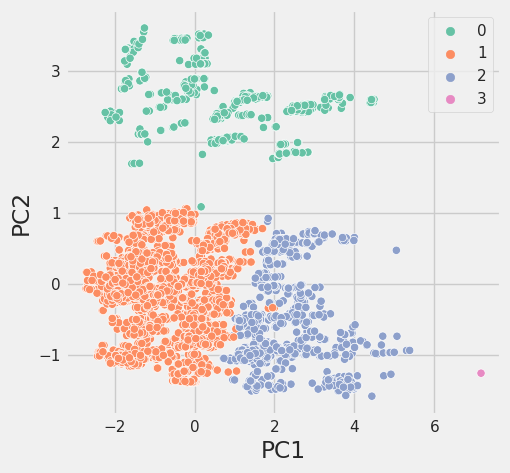

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=agg.labels_, palette='Set2')
plt.show()

### Dendrograma

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [20.0, 20.0, 42.5, 42.5],
  [65.0, 65.0, 75.0, 75.0],
  [85.0, 85.0, 95.0, 95.0],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [145.0, 145.0, 155.0, 155.0],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [150.0, 150.0, 172.5, 172.5],
  [135.0, 135.0, 161.25, 161.25],
  [112.5, 112.5, 148.125, 148.125],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [235.0, 235.0, 245.0, 245.0],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [240.0, 240.0, 262.5, 262.5],
  [225.0, 225.0, 251.25, 251.25],
  [202.5, 202.5, 238.125, 238.125],
  [130.3125, 130.3125, 220.3125, 220.3125],
  [90.0, 90.0, 175.3125, 175.3125],
  [295.0, 295.0, 305.0, 305.0],
  [315.0, 315.0, 325.0, 325.0],
  [355.0, 355.0, 365.0, 365.0],
  [345.0, 345.0, 360.0, 360.0],
  [335.0, 335.0, 352.5, 352.5],
  [320.0, 320.0, 343.75, 343.75],
  [300.0, 300.0, 331.875

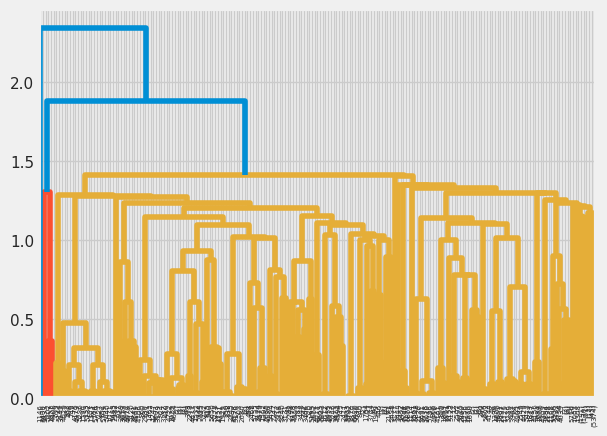

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(data_hierarchy)
dendrogram(Z, truncate_mode = 'level', p = 15)

## Densidade

In [ ]:
# Transformando todos os valores object em numérico
data_density = data_normal.copy()
#data_density = data_density.drop(['y_kmeans'], axis = 1)
display(data_density)

Make     Model  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
0     0.80 -1.001304       0.000000        1.500000        1.0     -1.333333   
1     0.75 -0.790091      -0.333333        0.444444        0.0     -0.666667   
2     0.35  0.146023      -0.444444        0.222222        0.0     -0.333333   
3    -0.20  0.282920       0.444444        1.111111        1.0      1.111111   
4     1.10 -0.409387      -0.444444       -0.666667       -1.0      1.111111   
...    ...       ...            ...             ...        ...           ...   
5986 -0.20 -0.091265      -0.444444       -0.555556       -1.0      1.111111   
5987 -0.05 -0.481095      -0.666667       -0.666667       -1.0      1.000000   
5988  0.60  0.089961       0.444444       -0.555556       -1.0      0.222222   
5989  0.60  0.093872      -0.333333       -0.777778       -1.0      1.111111   
5990 -0.85  0.825293      -0.666667       -0.333333       -1.0      1.111111   

      Fuel Type  Fuel Consumption Comb (L/100 km)  CO2 Emissions(g/km)  
0           0.0                          1.105263             1.219512  
1           1.0                          0.342105             0.341463  
2           1.0                          0.105263             0.158537  
3           0.0                          0.552632             0.634146  
4           0.0                         -0.815789            -0.853659  
...         ...                               ...                  ...  
5986        0.0                         -0.368421            -0.353659  
5987        0.0                         -0.763158            -0.841463  
5988        1.0                         -0.657895            -0.682927  
5989        1.0                         -0.657895            -0.731707  
5990        1.0                         -0.210526            -0.256098  

[5991 rows x 9 columns]

In [ ]:
# ump = umap.UMAP(random_state=42)
# umap_data = ump.fit_transform(data_hierarchy)

### Executando

In [ ]:
from sklearn.cluster import DBSCAN

# eps = 1.1 fica bem parecido com os resultados do método de hierarquia
# eps < 1 dá mais clusters

dbscan = DBSCAN(eps=1.1, min_samples=5)
dbscan.fit(df_pca)

DBSCAN(eps=1.1)

### Gráfico

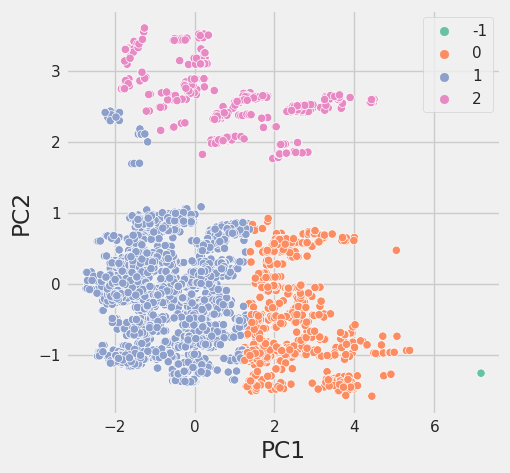

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=dbscan.labels_, palette='Set2')
plt.show()